# Analysis QoS Experiment

#Load libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
# import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
pd.options.mode.chained_assignment = None  # default='warn'

ModuleNotFoundError: No module named 'wordcloud'

#Load dataset and apply preprocessing

In [2]:
# feedbacks_stress = pd.read_csv("QoS_Experiment-English.csv", parse_dates=['Created_date'])
# feedbacks_stress.drop_duplicates(subset ="Published_date_x", 
#                      keep = 'first', inplace = True) 

# feedbacks_stress = feedbacks_stress[feedbacks_stress["Preferred_video"]!=0]
# feedbacks_stress = feedbacks_stress.reset_index()

# feedbacks_stress.shape[0]

In [3]:
#Updated dataset
feedbacks_stress = pd.read_excel("Dataset-updated.xlsx", parse_dates=['Created_date'])
feedbacks_stress.shape[0]

1002

In [4]:
feedbacks_outlier = pd.read_excel("Dataset-outliers_removed.xlsx", parse_dates=['Created_date'])

In [4]:
to_drop_list = feedbacks_stress.loc[(feedbacks_stress.Dif_interests == 0) & (feedbacks_stress.Annoyance > 3) & (feedbacks_stress.Preferred_video == 1)].index.tolist()
df_temp = feedbacks_stress.drop(to_drop_list)

In [5]:
df_temp.to_excel("Dataset-outliers_.xlsx", sheet_name='Sheet_name_1') 

In [6]:
df_temp = df_temp.reset_index(drop=True)

In [24]:
df_temp.shape[0]

943

In [303]:
to_drop_list2 = feedbacks_stress.loc[(feedbacks_stress.Dif_interests < 0)].index.tolist()
to_drop_list3 = feedbacks_stress.loc[(feedbacks_stress.Dif_interests > 3)].index.tolist()
to_drop_list2 += to_drop_list3
df_temp2 = feedbacks_stress.drop(to_drop_list2)
df_temp2 = df_temp2.reset_index(drop=True)

In [305]:
df_temp2.shape[0]

789

In [49]:
df_temp2.shape[0]

730

# Create dataframe for QoS/QoE Function

In [9]:
feedbacks_stress.columns

Index(['index', 'Id', 'Session', 'Explanation_en', 'Explanation_pt',
       'Created_date', 'Published_date_x', 'Annoyance', 'intLowQoS',
       'intHighQoS', 'Comment_en', 'Commment_pt', 'Email', 'English',
       'Session_key', 'Preferred_video', 'Version', 'User_Id', 'Stress',
       'Dif_interests', 'PolarityScore', 'Negative', 'Neutral', 'Positive',
       'Text_Len_pt', 'Text_Len_en', 'Text_Len_pt(abs)', 'Text_Len_en(abs)'],
      dtype='object')

In [15]:
temp = df_QoE[df_QoE[df_QoE.columns[0]]==0]
temp = temp[temp[temp.columns[1]]==0]
# temp = temp[temp[temp.columns[2]]==0]
temp

,interest(low),QoS(low),QoE(low),interest(high),QoS(high),QoE(high),Preference
93,0,0,NaN,3,5,NaN,1
119,0,0,NaN,0,5,NaN,1
298,0,0,NaN,5,5,NaN,1
369,0,0,NaN,4,5,NaN,1
394,0,0,NaN,0,5,NaN,1
404,0,0,NaN,3,5,NaN,1
494,0,0,NaN,0,5,NaN,1
496,0,0,NaN,0,5,NaN,1
618,0,0,NaN,0,5,NaN,1
637,0,0,NaN,1,5,NaN,1


In [34]:
feedbacks_stress.iloc[0]['Preferred_video']==1

True

In [24]:
def calculateQoE(interest, qos):
    return (interest+qos)/2

calculateQoE(df_QoE.iloc[0]['interest(low)'].values[0],
             df_QoE.iloc[0]['QoS(low)'].values[0])

3.5

In [11]:
def createQoEData(data):
    df_QoE = pd.DataFrame(columns=[['interest(low)', 'QoS(low)', 'QoE(low)',
                                    'interest(high)', 'QoS(high)', 'QoE(high)',
                                    'Preference']],
                          index=range(data.shape[0]))

    for i in range(data.shape[0]):
        df_QoE.iloc[i]['interest(low)'] = data.iloc[i]['intLowQoS']
        df_QoE.iloc[i]['QoS(low)'] = 5 - data.iloc[i]['Annoyance']
        df_QoE.iloc[i]['interest(high)'] = data.iloc[i]['intHighQoS']
        df_QoE.iloc[i]['QoS(high)'] = 5
        df_QoE.iloc[i]['Preference'] = data.iloc[i]['Preferred_video'] - 1
        
    return df_QoE
    
# createQoEData(feedbacks_stress)

In [2]:
def verify(data, a=0.5, b=0.5, previous=0):
    df_temp = data.copy()
    counter = 0
    for i in range (data.shape[0]):
        preference = data.iloc[i]['Preference'].values[0]
        QoE_low = (data.iloc[i]['interest(low)'].values[0]*a + data.iloc[i]['QoS(low)'].values[0]*b)
        QoE_high = (data.iloc[i]['interest(high)'].values[0]*a + data.iloc[i]['QoS(high)'].values[0]*b)
        df_temp.loc[i]['QoE(low)'] = QoE_low
        df_temp.loc[i]['QoE(high)'] = QoE_high
        
        #verify
        if (QoE_low>=QoE_high):
            if (preference==0):
                counter+=1
                
        elif (QoE_high>=QoE_high):
            if (preference==1):
                counter+=1
        
    return [df_temp, counter]

In [4]:
df_QoE = createQoEData(feedbacks_outlier)
ret = verify(df_QoE,a=0.72, b=0.28)
df_QoE = ret[0]
print(ret[1]/df_QoE.shape[0])
display(df_QoE)

NameError: name 'createQoEData' is not defined

In [3]:
verify(df_QoE)[1]

NameError: name 'df_QoE' is not defined

In [123]:
# df_QoE.pivot(1)

In [159]:
type(feedbacks_stress)

pandas.core.frame.DataFrame

In [160]:
type(df_QoE)

pandas.core.frame.DataFrame

In [9]:
# sns.heatmap(ret[0][['interest(low)', 'QoS(low)']])

In [25]:
type(feedbacks_stress.Preferred_video)

pandas.core.series.Series

In [23]:
type(df_QoE.Preference)

pandas.core.frame.DataFrame

0.985153764581124


,interest(low),QoS(low),QoE(low),interest(high),QoS(high),QoE(high),Preference
0,3,4,3,1,5,1,0
1,5,2,5,3,5,3,0
2,4,1,4,1,5,1,0
3,4,2,4,4,5,4,1
4,2,0,2,2,5,2,1
5,0,5,0,0,5,0,0
6,3,0,3,0,5,0,1
7,0,5,0,0,5,0,0
8,0,1,0,0,5,0,1
9,2,0,2,2,5,2,1


In [92]:
df_temp2.shape[0]

730

In [123]:
df_temp2 = feedbacks_stress[feedbacks_stress.Session==7]
df_temp2 = df_temp2[df_temp2.English==0]
df_temp2.shape[0]

144

In [7]:
df_music = feedbacks_outlier[feedbacks_outlier.Session==7]
df_music.shape[0]

146

In [337]:
feedbacks_stress[feedbacks_stress.Preferred_video==1].shape[0]

441

In [338]:
feedbacks_stress[feedbacks_stress.Preferred_video==2].shape[0]

561

In [339]:
feedbacks_stress[feedbacks_stress.Annoyance<=2].shape[0]

216

In [170]:
df_QoE = createQoEData(feedbacks_outlier)
ret = verify(df_QoE)
df_QoE = ret[0]
print(ret[1]/df_QoE.shape[0])
display(df_QoE)

945

In [18]:
df_sub = feedbacks_stress[feedbacks_stress.Dif_interests<=3]
df_sub = df_sub[df_sub.Dif_interests>=1]
df_sub

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
0,0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,...,7,2,0.4404,0.000,0.674,0.326,-6,-8,6,8
1,1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,...,7,2,0.2484,0.218,0.484,0.298,-8,-9,8,9
2,2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,...,7,3,0.5563,0.000,0.455,0.545,-4,-6,4,6
6,6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,...,10,3,-0.5994,0.450,0.550,0.000,8,8,8,8
12,12,36,2,I liked the joke,Gostei da piada,2018-03-06 00:32:39,2018-03-06 0:32:39,1,3,1,...,1,2,0.6124,0.000,0.167,0.833,-3,-4,3,4
14,14,39,4,I laughed a lot,Ri muito,2018-03-06 00:37:33,2018-03-06 0:37:33,2,4,1,...,1,3,0.4588,0.000,0.250,0.750,-2,-4,2,4
16,16,42,6,I had never seen a scene from that,Nunca tinha visto uma cena daquela,2018-03-06 00:43:01,2018-03-06 0:43:01,3,3,2,...,1,1,0.0000,0.000,1.000,0.000,-6,-8,6,8
17,17,44,7,"Apart from that sensationalism, I find fascina...","Tirando aquele sensacionalismo, eu acho buraco...",2018-03-06 00:45:33,2018-03-06 0:45:33,2,4,2,...,1,2,0.5423,0.000,0.667,0.333,-8,-9,8,9
20,20,47,3,I was simply more interested in the trailer (c...,Simplesmente fiquei mais interessado pelo trai...,2018-03-06 23:05:46,2018-03-06 23:05:46,4,4,3,...,8,1,0.6253,0.000,0.702,0.298,-14,-15,14,15
21,21,48,4,The events attracted my attention more than in...,Os acontecimentos atraíram mais minha atenção ...,2018-03-06 23:08:31,2018-03-06 23:08:31,5,4,2,...,8,2,0.4215,0.000,0.833,0.167,-15,-15,15,15


NameError: name 'db_sub' is not defined

In [340]:
stress[feedbacks_stress.English == 0]
feedbacks_stress.shape[0]

160

In [22]:
import pydotplus
import collections
a= ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore']
b= ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore', 'Stress']
c = ['Annoyance', 'Stress', 'PolarityScore']
d = ['Dif_interests']
e = ['Dif_interests', 'Annoyance']
f = ['Dif_interests', 'PolarityScore']
g = ['Dif_interests', 'Annoyance', 'Stress']

In [6]:
from graphviz import render
render('dot', 'pdf', 'z_tree3_pt.dot')  

'z_tree3_pt.dot.pdf'

In [59]:
teste = pydotplus.graphviz.Dot()

In [30]:
from graphviz import Digraph

In [6]:
df_soccer = feedbacks_outlier[feedbacks_outlier.Session==1]
df_soccer.shape[0]

142

In [35]:
#Draw Decision Tree

#Arvore de decisao
def drawTree(feedbacks, features = ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore'],
           feature_names = ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore'],
           stress=False, dif=False,
           impurity_split=0.345):
    
    from sklearn.model_selection import cross_validate

    
    clf = tree.DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=7, max_depth=7, min_impurity_decrease=0.001)    
#     clf = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=15, max_depth=4, min_impurity_decrease=0.003)
    #clf = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=15, max_depth=4, min_impurity_split=impurity_split)
    #clf = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=15, max_depth=4, min_impurity_decrease=0.0011)
#     clf = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=8, max_depth=4, min_impurity_decrease=0.015)
#     clf = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=15, max_depth=4, min_impurity_decrease=0.006)
    #     clf = tree.DecisionTreeClassifier()
    
    X = []
    for feature in features:
        X.append(feedbacks[feature])
    X = np.array(X).transpose()

#     if stress:
#         feature_names.append('Estresse')
#         X = np.append(X, np.array(feedbacks['Stress']).reshape(-1, 1), axis=1)
#     if dif:
#         feature_names.append('IntLowQoS-IntHighQoS')
#         X = np.append(X, np.array(feedbacks['Dif_interests']).reshape(-1, 1), axis=1)
    Y = np.array(feedbacks['Preferred_video'])
       
    clf.fit(X, Y)
    
    
    predicted = clf.predict(X)

#     print("Accuracy_Cross_validation:")
#     print(applyDecisionTree(feedbacks,clf))
    print('\n\nAccuracy_Basic:')
    print(accuracy_score(Y, predicted))
    
    dot_data = tree.export_graphviz(clf,
                                    feature_names=feature_names,
                                    max_depth=7,
                                    class_names=['LowQoS', 'HighQoS'],
#                                     class_names=None,
                                    node_ids=False,
                                    leaves_parallel=False,
                                    proportion=False,
                                    rounded=True,
                                    label=True,
                                    filled=True,
                                    out_file=None) 
#                                     out_file="z_tree3.dot") 

    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")


#     dot_data = tree.export_graphviz(clf,
#                                     feature_names=feature_names,
#                                     out_file=None,
#                                     filled=True,
#                                     node_ids=True,
#                                     label="all",
#                                     impurity=False,
# #                                     class_names=['LowQoS', 'HighQoS'],
#                                     rounded=False)
    graph = pydotplus.graph_from_dot_data(dot_data)
    
#     colors = ('#e6adad','#dbf0f9')
#     edges = collections.defaultdict(list)

#     for edge in graph.get_edge_list():
#         edges[edge.get_source()].append(int(edge.get_destination()))

#     for edge in edges:
#         edges[edge].sort()    
#         for i in range(2):
#             dest = graph.get_node(str(edges[edge][i]))[0]
#             dest.set_fillcolor(colors[i])

    
    
    graph.write_pdf('_tree-teste.pdf')
    return graph


# dif_123 = feedbacks_stress[feedbacks_stress['dif_interesses'].isin([1, 2, 3])]

drawTree(df_sub, features=a, feature_names=a)
# graph = drawTree(feedbacks_stress, features=a, feature_names=a)
# graph.render('arvore')
# graph



Accuracy_Basic:
0.8579088471849866


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


0.8695652173913043


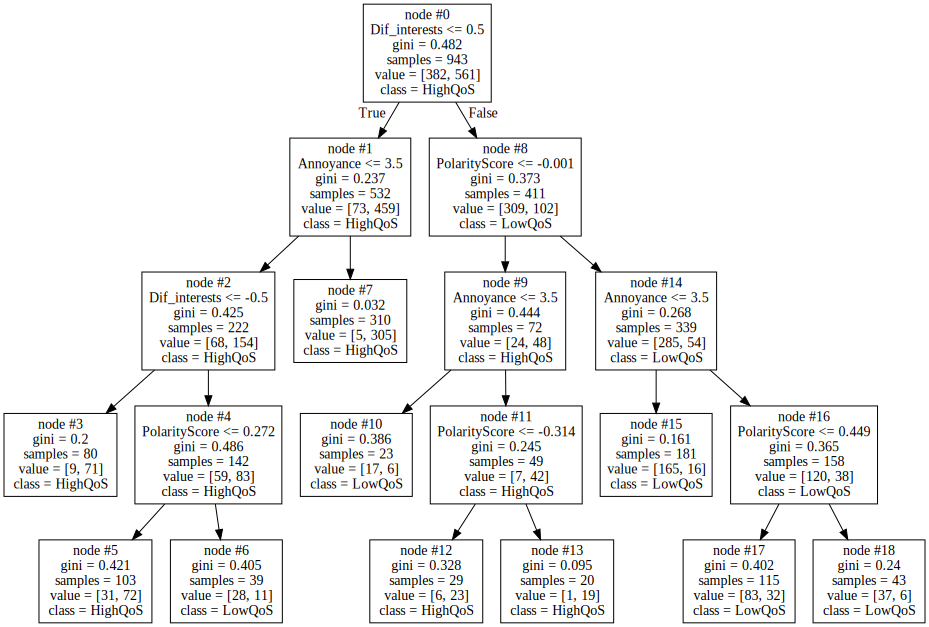

In [282]:
graph = drawTree(feedbacks_outlier, features=a, feature_names=a, impurity_split=0.236778)
graph.render('arvore')
graph

0.8033932135728543


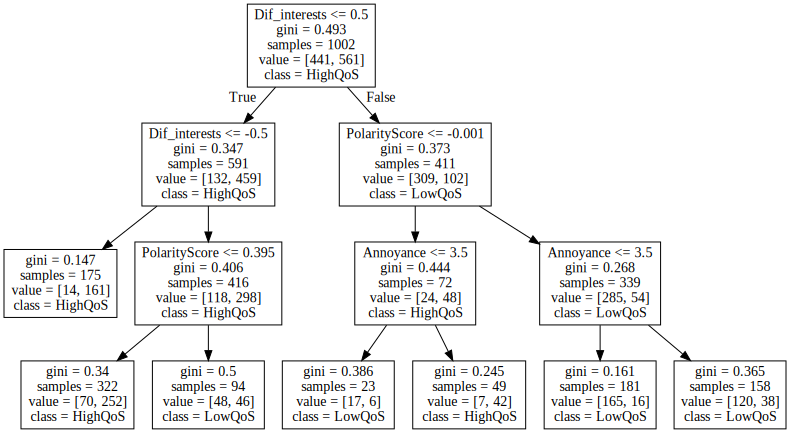

In [203]:
graph = drawTree(feedbacks_stress, features=a, feature_names=a)

graph.render('arvore')
graph

In [6]:
feedbacks_stress[feedbacks_stress["English"]==1]

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
232,236,284,1,NaN,NaN,2018-07-13 04:15:17,2018-07-13 4:15:17,3,3,1,...,3,2,0.0000,0.000,0.000,0.000,0,0,0,0
233,237,285,7,"No interruptions, regardless of the slight dec...","No interruptions, regardless of the slight dec...",2018-07-13 04:18:51,2018-07-13 4:18:51,5,3,3,...,3,0,-0.5994,0.412,0.588,0.000,9,9,9,9
234,238,286,4,No interrupts,No interrupts,2018-07-13 04:21:10,2018-07-13 4:21:10,4,3,1,...,3,2,-0.5423,1.000,0.000,0.000,2,2,2,2
281,286,346,7,because there were no interruptions; lower vid...,because there were no interruptions; lower vid...,2018-07-27 05:56:55,2018-07-27 5:56:55,4,4,4,...,8,0,-0.5145,0.183,0.746,0.071,35,35,35,35
282,287,347,4,"no interruptions, despite the fact that it was...","no interruptions, despite the fact that it was...",2018-07-27 05:59:59,2018-07-27 5:59:59,5,4,2,...,8,2,-0.7574,0.517,0.483,0.000,10,10,10,10
318,323,385,1,Funnier,Funnier,2018-07-29 12:48:41,2018-07-29 12:48:41,3,3,3,...,9,0,0.4019,0.000,0.000,1.000,-1,-1,1,1
319,324,386,7,NaN,NaN,2018-07-29 12:50:24,2018-07-29 12:50:24,4,4,4,...,9,0,0.0000,0.000,0.000,0.000,0,0,0,0
326,331,393,1,The flaws were better,The flaws were better,2018-07-29 22:46:40,2018-07-29 22:46:40,4,1,1,...,3,0,0.4404,0.000,0.508,0.492,4,4,4,4
327,332,394,7,NaN,NaN,2018-07-29 22:48:31,2018-07-29 22:48:31,5,5,3,...,3,2,0.0000,0.000,0.000,0.000,0,0,0,0
328,333,395,4,NaN,NaN,2018-07-29 22:50:24,2018-07-29 22:50:24,4,4,4,...,3,0,0.0000,0.000,0.000,0.000,0,0,0,0


In [8]:
def getSessionInfo(input_data):
    session_info = pd.DataFrame(columns=['Session', 'Description', 'Num. users', 'Preferred HighQoS', 'Preferred LowQoS',
                                          'Annoyance (mean)',  'intLowQoS (mean)', 'intHighQoS (mean)',
                                           'Annoyance (std)', 'intLowQoS (std)', 'intHighQoS (std)'], index=range(8))

    categ_session = ['All sesions', 'Soccer', 'Comedy', 'Animals', 'Radical sports', 'Animals documentary', 'Science documentary', 'Music']

    for i in range(0, 8):
        if (i==0):
            df_temp = input_data[['Preferred_video', 'Annoyance', 'intLowQoS', 'intHighQoS']]
            
        elif (i==1):
            df_temp = input_data[ input_data['Session'] == i ][input_data['English'] == 0][['Preferred_video', 'Annoyance', 'intLowQoS', 'intHighQoS']]     
        
        else:
            df_temp = input_data[ input_data['Session'] == i ][['Preferred_video', 'Annoyance', 'intLowQoS', 'intHighQoS']]     
        
        session_info['Session'][i] = i
        session_info['Description'][i] = categ_session[i]
        session_info['Num. users'][i] =  df_temp.shape[0]
        session_info['Preferred HighQoS'][i] = df_temp[ df_temp['Preferred_video'] == 2].shape[0]
        session_info['Preferred LowQoS'][i] = df_temp[ df_temp['Preferred_video'] == 1].shape[0]
            
        df_temp = df_temp.describe()
        session_info['Annoyance (mean)'][i] = np.round( df_temp['Annoyance']['mean'], 2)
        session_info['intLowQoS (mean)'][i] = np.round( df_temp['intLowQoS']['mean'], 2)
        session_info['intHighQoS (mean)'][i] = np.round( df_temp['intHighQoS']['mean'], 2)
        session_info['Annoyance (std)'][i] = np.round( df_temp['Annoyance']['std'], 2)
        session_info['intLowQoS (std)'][i] = np.round( df_temp['intLowQoS']['std'], 2)
        session_info['intHighQoS (std)'][i] = np.round( df_temp['intHighQoS']['std'], 2)
        
    return session_info

In [23]:
np.round(3.354, 2)

3.35

In [9]:
getSessionInfo(feedbacks_stress)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


,Session,Description,Num. users,Preferred HighQoS,Preferred LowQoS,Annoyance (mean),intLowQoS (mean),intHighQoS (mean),Annoyance (std),intLowQoS (std),intHighQoS (std)
0,0,All sesions,1002,561,441,3.56,3.31,2.77,1.33,1.42,1.51
1,1,Soccer,132,75,57,3.83,3.27,2.5,1.19,1.64,1.66
2,2,Comedy,118,78,40,3.52,3.26,2.97,1.42,1.34,1.5
3,3,Animals,135,64,71,3.32,2.93,2.13,1.42,1.52,1.52
4,4,Radical sports,158,84,74,3.53,3.16,2.49,1.24,1.35,1.35
5,5,Animals documentary,135,95,40,3.58,3.13,3.08,1.39,1.38,1.49
6,6,Science documentary,141,55,86,3.33,3.94,3.05,1.33,1.25,1.43
7,7,Music,163,98,65,3.8,3.56,3.18,1.3,1.22,1.4


In [28]:
temp = feedbacks_stress[feedbacks_stress['Session']==1]
np.mean(temp[temp['English']==0]['Annoyance'])

3.8333333333333335

In [42]:
feedbacks_outlier.describe()

,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,User_Id,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt_abs,Text_Len_en_abs
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.00000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,516.378579,598.755037,4.056204,3.496288,3.295864,2.715801,0.059385,1.59491,1.961824,253.632025,6.822906,0.580064,0.083095,0.108863,0.643517,0.179749,1.593849,1.730647,7.517497,7.853659
std,298.283465,326.338073,2.011649,1.342486,1.415884,1.504358,0.236469,0.49117,0.191723,140.773505,2.427598,1.659338,0.378640,0.228911,0.327003,0.251404,10.686095,11.187914,7.756475,8.149988
min,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,-5.000000,-0.909900,0.000000,0.000000,0.000000,-45.000000,-45.000000,0.000000,0.000000
25%,259.500000,312.500000,2.000000,3.000000,2.000000,2.000000,0.000000,1.00000,2.000000,143.000000,5.000000,0.000000,0.000000,0.000000,0.401000,0.000000,-4.000000,-4.000000,3.000000,2.000000
50%,516.000000,610.000000,4.000000,4.000000,4.000000,3.000000,0.000000,2.00000,2.000000,266.000000,8.000000,0.000000,0.000000,0.000000,0.701000,0.000000,2.000000,2.000000,5.000000,5.000000
75%,775.500000,876.500000,6.000000,5.000000,4.000000,4.000000,0.000000,2.00000,2.000000,372.000000,8.000000,2.000000,0.440400,0.104500,1.000000,0.319500,6.000000,6.000000,10.000000,10.000000
max,1030.000000,1153.000000,7.000000,5.000000,5.000000,5.000000,1.000000,2.00000,2.000000,479.000000,10.000000,5.000000,0.923100,1.000000,1.000000,1.000000,56.000000,60.000000,56.000000,60.000000


In [40]:
feedbacks_stress.describe()

,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,User_Id,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,511.931138,593.807385,4.078842,3.555888,3.311377,2.765469,0.056886,1.559880,1.964072,251.522954,6.848303,0.545908,0.087359,0.105512,0.641722,0.182902,1.099800,1.226547,7.475050,7.793413
std,298.318548,326.431335,2.032398,1.329512,1.416631,1.511820,0.231741,0.496649,0.186204,140.845690,2.420967,1.615481,0.375421,0.224729,0.328237,0.254110,10.713414,11.214625,7.749569,8.153267
min,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,-0.909900,0.000000,0.000000,0.000000,-45.000000,-45.000000,0.000000,0.000000
25%,254.250000,307.250000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,2.000000,136.000000,5.000000,0.000000,0.000000,0.000000,0.401000,0.000000,-4.000000,-4.000000,3.000000,2.000000
50%,507.500000,601.500000,4.000000,4.000000,4.000000,3.000000,0.000000,2.000000,2.000000,262.000000,8.000000,0.000000,0.000000,0.000000,0.698500,0.000000,2.000000,2.000000,5.000000,5.000000
75%,772.750000,870.750000,6.000000,5.000000,4.000000,4.000000,0.000000,2.000000,2.000000,370.750000,8.000000,2.000000,0.440400,0.099750,1.000000,0.326000,5.750000,6.000000,10.000000,10.000000
max,1030.000000,1153.000000,7.000000,5.000000,5.000000,5.000000,1.000000,2.000000,2.000000,479.000000,10.000000,5.000000,0.923100,1.000000,1.000000,1.000000,56.000000,60.000000,56.000000,60.000000


In [35]:
np.std(feedbacks_stress['intHighQoS'])

1.511065383216823

In [5]:
getSessionInfo()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


,Session,Description,Num. users,Preferred HighQoS,Preferred LowQoS,Annoyance (mean),intLowQoS (mean),intHighQoS (mean),Annoyance (std),intLowQoS (std),intHighQoS (std)
0,0,All sesions,945,522,423,3.56825,3.32063,2.77143,1.32761,1.43276,1.53443
1,1,Soccer,132,75,57,3.83333,3.27273,2.5,1.19264,1.63964,1.66004
2,2,Comedy,118,78,40,3.51695,3.26271,2.9661,1.41864,1.34246,1.49605
3,3,Animals,135,64,71,3.31852,2.93333,2.13333,1.41765,1.51707,1.5151
4,4,Radical sports,140,73,67,3.54286,3.12857,2.5,1.24872,1.39291,1.40656
5,5,Animals documentary,135,95,40,3.57778,3.12593,3.08148,1.39009,1.38451,1.49153
6,6,Science documentary,141,55,86,3.32624,3.93617,3.04965,1.33361,1.24907,1.42591
7,7,Music,144,82,62,3.85417,3.54167,3.15972,1.21165,1.26753,1.47076


In [6]:
temp = getSessionInfo()
df_plot = pd.DataFrame(columns=['Session', 'Dif_int', 'intLowQoS', 'intHighQoS'], index=range(8))
df_plot['Session'] = temp['Description']
df_plot['Annoyance'] = temp['Annoyance (mean)']
df_plot['intLowQoS'] = temp['intLowQoS (mean)']
df_plot['intHighQoS'] = temp['intHighQoS (mean)']
for i in range(8):
    df_plot['Dif_int'][i] = temp['intLowQoS (mean)'][i] - temp['intHighQoS (mean)'][i]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


In [16]:
feedbacks_stress[feedbacks_stress.English==1]

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
232,236,284,1,NaN,NaN,2018-07-13 04:15:17,2018-07-13 4:15:17,3,3,1,...,3,2,0.0000,0.000,0.000,0.000,0,0,0,0
233,237,285,7,"No interruptions, regardless of the slight dec...","No interruptions, regardless of the slight dec...",2018-07-13 04:18:51,2018-07-13 4:18:51,5,3,3,...,3,0,-0.5994,0.412,0.588,0.000,9,9,9,9
234,238,286,4,No interrupts,No interrupts,2018-07-13 04:21:10,2018-07-13 4:21:10,4,3,1,...,3,2,-0.5423,1.000,0.000,0.000,2,2,2,2
281,286,346,7,because there were no interruptions; lower vid...,because there were no interruptions; lower vid...,2018-07-27 05:56:55,2018-07-27 5:56:55,4,4,4,...,8,0,-0.5145,0.183,0.746,0.071,35,35,35,35
282,287,347,4,"no interruptions, despite the fact that it was...","no interruptions, despite the fact that it was...",2018-07-27 05:59:59,2018-07-27 5:59:59,5,4,2,...,8,2,-0.7574,0.517,0.483,0.000,10,10,10,10
318,323,385,1,Funnier,Funnier,2018-07-29 12:48:41,2018-07-29 12:48:41,3,3,3,...,9,0,0.4019,0.000,0.000,1.000,-1,-1,1,1
319,324,386,7,NaN,NaN,2018-07-29 12:50:24,2018-07-29 12:50:24,4,4,4,...,9,0,0.0000,0.000,0.000,0.000,0,0,0,0
326,331,393,1,The flaws were better,The flaws were better,2018-07-29 22:46:40,2018-07-29 22:46:40,4,1,1,...,3,0,0.4404,0.000,0.508,0.492,4,4,4,4
327,332,394,7,NaN,NaN,2018-07-29 22:48:31,2018-07-29 22:48:31,5,5,3,...,3,2,0.0000,0.000,0.000,0.000,0,0,0,0
328,333,395,4,NaN,NaN,2018-07-29 22:50:24,2018-07-29 22:50:24,4,4,4,...,3,0,0.0000,0.000,0.000,0.000,0,0,0,0


In [9]:
import seaborn as sns

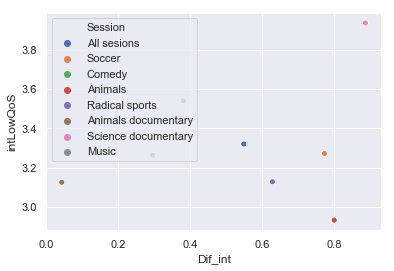

In [27]:
import seaborn as sns;
sns.set()

ax = sns.scatterplot(x="Dif_int", y="intHighQoS", hue="Session", data=df_plot, legend='brief')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_iris.sepal_length, df_iris.sepal_width, df_iris.species, plt.gca())

ax

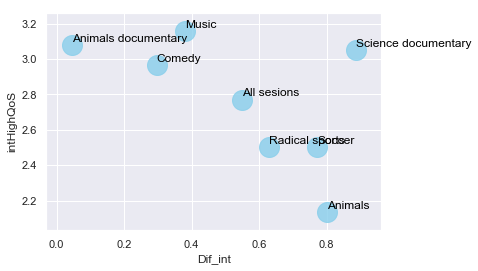

In [41]:
# basic plot
p1=sns.regplot(data=df_plot, x="Dif_int", y="intHighQoS", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
 
# add annotations one by one with a loop
for line in range(0,df_plot.shape[0]):
     p1.text(df_plot.Dif_int[line], df_plot.intHighQoS[line]+0.02, df_plot.Session[line], horizontalalignment='left', size='medium', color='black')
 
# see it
# sns.plt.show()


In [ ]:
df_plot.plot.scatter(x='Dif_int',y='Annoyance')

In [ ]:
df_plot['Dif_int']

In [ ]:
df_plot['Annoyance']

In [3]:
feedbacks_stress

,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,Comment_en,Commment_pt,Email,English,Session_key,Preferred_video,Version,User_Id,Stress,Dif_interests
0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,I found this comparison interesting that you a...,achei interessante essa comparação que vocês e...,sadoc@dcc.ufrj.br,0,NaN,1,1,25,7,2
1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,"the flaws were perceptible, but even so I like...","as falhas foram perceptíveis, mas mesmo assim ...",sadoc@dcc.ufrj.br,0,NaN,1,2,25,7,2
2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,NaN,NaN,sadoc@dcc.ufrj.br,0,NaN,1,2,25,7,3
3,104,5,because it had fewer interruptions,porque teve menos interrupções,2018-06-01 18:51:08,2018-06-01 18:51:08,3,4,4,NaN,NaN,sadoc@dcc.ufrj.br,0,NaN,2,2,25,7,0
4,28,1,Because he had no interruptions.,Porque não teve interrupções.,2018-03-05 23:00:43,2018-03-05 23:00:43,5,2,2,I hated video 2,Detestei o vídeo 2,mattgouvea@gmail.com,0,NaN,2,1,1,10,0
5,29,2,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:09,2018-03-05 23:04:09,0,0,0,The interruptions do not bother me as much as ...,As interrupções não me incomodaram tanto pois ...,mattgouvea@gmail.com,0,NaN,1,1,1,10,0
6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,My sense of humor spoke louder and I was not p...,Meu senso de humor falou mais alto e eu não es...,mattgouvea@gmail.com,0,NaN,2,1,1,10,3
7,31,4,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04,2018-03-05 23:16:04,0,0,0,I'm not interested in the topic of any of the ...,Não me interesso pelo tópico de nenhum dos víd...,mattgouvea@gmail.com,0,NaN,1,1,1,10,0
8,32,5,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:33,2018-03-05 23:27:33,4,0,0,I began to notice that random videos do not in...,Comecei a reparar que vídeos aleatórios não me...,mattgouvea@gmail.com,0,NaN,2,1,1,10,0
9,33,6,Because you gave me more relevant information,Porque me deu informações mais relevantes,2018-03-05 23:32:57,2018-03-05 23:32:57,5,2,2,"There was an interruption in the video, at a c...","Teve uma interrupção no vídeo, num momento cru...",mattgouvea@gmail.com,0,NaN,2,1,1,10,0


In [17]:
df_sentiment.columns

Index(['Preferred_Video', 'Sentence', 'Compound', 'Negative', 'Neutral',
       'Positive', 'Prediction'],
      dtype='object')

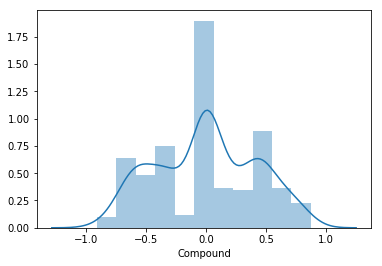

In [27]:
sns.distplot(df_sentiment['Compound'][df_sentiment['Preferred_Video'] == 2]);

In [14]:
feedbacks_stress['Preferred_video'][3]

2

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
# sid.lexicon.update(new_words)


#COUNT and then REMOVE missing values
feedbacks_filtered = feedbacks_stress.fillna('')
missing_values = feedbacks_stress.loc[feedbacks_stress.Explanation_en == '', 'Explanation_en'].count()

print('Missing values: '+str(missing_values))
print('Percent of missing values: '+ str( (missing_values/feedbacks_filtered.shape[0])*100 )+'%' )

feedbacks_filtered = feedbacks_filtered[~feedbacks_filtered['Explanation_en'].isin([''])]
feedbacks_filtered = feedbacks_filtered.reset_index(drop=True)

df_sentiment = pd.DataFrame(columns=['Preferred_Video','Sentence','Compound','Negative','Neutral','Positive', 'Prediction'])


index = 0
for sentence in feedbacks_filtered.Explanation_en:
    class_temp = 0
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     for k in sorted(ss):
#         print('{0}: {1}, '.format(k, ss[k]), end='')
#     print()
    
    if (ss['compound'] < 0.34):
        class_temp = 2
    else:
        class_temp = 1
    df_sentiment.loc[index] = [feedbacks_filtered['Preferred_video'][index], sentence,
                               ss['compound'], ss['neg'], ss['neu'], ss['pos'], np.int64(class_temp)]

    index +=1
    
y1 = np.array(feedbacks_filtered["Preferred_video"])
y2 = np.array(df_sentiment['Prediction'].astype(str).astype(int))

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print ("")
print("Accuracy: "+ str(accuracy_score(y1,y2)) + "%")
print("Precision class1 (lowQoS): "+ str(precision_score(y1,y2, pos_label=1)) + "%")
print("Precision class2 (highQoS): "+ str(precision_score(y1,y2, pos_label=2)) + "%")

Missing values: 0
Percent of missing values: 0.0%

Accuracy: 0.6233905579399142%
Precision class1 (lowQoS): 0.5909090909090909%
Precision class2 (highQoS): 0.6411960132890365%


In [73]:
feedbacks_filtered

,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,Comment_en,Commment_pt,Email,English,Session_key,Preferred_video,Version,User_Id,Stress,Dif_interests
0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,I found this comparison interesting that you a...,achei interessante essa comparação que vocês e...,sadoc@dcc.ufrj.br,0,,1,1,25,7,2
1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,"the flaws were perceptible, but even so I like...","as falhas foram perceptíveis, mas mesmo assim ...",sadoc@dcc.ufrj.br,0,,1,2,25,7,2
2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,,,sadoc@dcc.ufrj.br,0,,1,2,25,7,3
3,104,5,because it had fewer interruptions,porque teve menos interrupções,2018-06-01 18:51:08,2018-06-01 18:51:08,3,4,4,,,sadoc@dcc.ufrj.br,0,,2,2,25,7,0
4,28,1,Because he had no interruptions.,Porque não teve interrupções.,2018-03-05 23:00:43,2018-03-05 23:00:43,5,2,2,I hated video 2,Detestei o vídeo 2,mattgouvea@gmail.com,0,,2,1,1,10,0
5,29,2,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:09,2018-03-05 23:04:09,0,0,0,The interruptions do not bother me as much as ...,As interrupções não me incomodaram tanto pois ...,mattgouvea@gmail.com,0,,1,1,1,10,0
6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,My sense of humor spoke louder and I was not p...,Meu senso de humor falou mais alto e eu não es...,mattgouvea@gmail.com,0,,2,1,1,10,3
7,31,4,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04,2018-03-05 23:16:04,0,0,0,I'm not interested in the topic of any of the ...,Não me interesso pelo tópico de nenhum dos víd...,mattgouvea@gmail.com,0,,1,1,1,10,0
8,32,5,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:33,2018-03-05 23:27:33,4,0,0,I began to notice that random videos do not in...,Comecei a reparar que vídeos aleatórios não me...,mattgouvea@gmail.com,0,,2,1,1,10,0
9,33,6,Because you gave me more relevant information,Porque me deu informações mais relevantes,2018-03-05 23:32:57,2018-03-05 23:32:57,5,2,2,"There was an interruption in the video, at a c...","Teve uma interrupção no vídeo, num momento cru...",mattgouvea@gmail.com,0,,2,1,1,10,0


In [92]:
feedbacks_filtered[feedbacks_filtered["Preferred_video"]==1].shape[0] + feedbacks_filtered[feedbacks_filtered["Preferred_video"]==2].shape[0]

932

In [91]:
df_sentiment[df_sentiment["Class"]==1].shape[0] + df_sentiment[df_sentiment["Class"]==2].shape[0]

932

In [1]:
# feedbacks_filtered["Preferred_video"]

In [106]:
type(df_sentiment["Class"][0])

int

In [128]:
y1 = np.array(feedbacks_filtered["Preferred_video"])
y2 = np.array(df_sentiment['Class'].astype(str).astype(int))

In [132]:
#Calculate accuracy:
from sklearn.metrics import accuracy_score

accuracy_score(y1,y2)


0.5965665236051502

In [50]:
feedbacks_filtered[feedbacks_filtered['Preferred_video'] == 0].shape[0]

0

In [7]:
feedbacks_stress

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
0,0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,...,7,2,0.4404,0.000,0.674,0.326,-6,-8,6,8
1,1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,...,7,2,0.2484,0.218,0.484,0.298,-8,-9,8,9
2,2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,...,7,3,0.5563,0.000,0.455,0.545,-4,-6,4,6
3,3,104,5,because it had fewer interruptions,porque teve menos interrupções,2018-06-01 18:51:08,2018-06-01 18:51:08,3,4,4,...,7,0,-0.4019,0.403,0.597,0.000,4,5,4,5
4,4,28,1,Because he had no interruptions.,Porque não teve interrupções.,2018-03-05 23:00:43,2018-03-05 23:00:43,5,2,2,...,10,0,-0.2960,0.355,0.645,0.000,4,5,4,5
5,5,29,2,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:09,2018-03-05 23:04:09,0,0,0,...,10,0,0.2732,0.000,0.792,0.208,-10,-9,10,9
6,6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,...,10,3,-0.5994,0.450,0.550,0.000,8,8,8,8
7,7,31,4,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04,2018-03-05 23:16:04,0,0,0,...,10,0,0.2263,0.000,0.808,0.192,-8,-9,8,9
8,8,32,5,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:33,2018-03-05 23:27:33,4,0,0,...,10,0,0.6369,0.000,0.698,0.302,13,17,13,17
9,9,33,6,Because you gave me more relevant information,Porque me deu informações mais relevantes,2018-03-05 23:32:57,2018-03-05 23:32:57,5,2,2,...,10,0,0.0000,0.000,1.000,0.000,6,7,6,7


In [ ]:
feedbacks

In [67]:
to_drop_list = feedbacks_stress.loc[(feedbacks_stress.Dif_interests == 0) & (feedbacks_stress.Annoyance > 3) & (feedbacks_stress.Preferred_video == 1)].index.tolist()
# test = test.loc[test.Annoyance > 3]
# test = test.loc[test.Preferred_video == 1]

# to_drop_list = test.index.tolist()
# to_drop_list

test = feedbacks_stress.drop(to_drop_list)
test

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
0,0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,...,7,2,0.4404,0.000,0.674,0.326,-6,-8,6,8
1,1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,...,7,2,0.2484,0.218,0.484,0.298,-8,-9,8,9
2,2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,...,7,3,0.5563,0.000,0.455,0.545,-4,-6,4,6
3,3,104,5,because it had fewer interruptions,porque teve menos interrupções,2018-06-01 18:51:08,2018-06-01 18:51:08,3,4,4,...,7,0,-0.4019,0.403,0.597,0.000,4,5,4,5
4,4,28,1,Because he had no interruptions.,Porque não teve interrupções.,2018-03-05 23:00:43,2018-03-05 23:00:43,5,2,2,...,10,0,-0.2960,0.355,0.645,0.000,4,5,4,5
5,5,29,2,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:09,2018-03-05 23:04:09,0,0,0,...,10,0,0.2732,0.000,0.792,0.208,-10,-9,10,9
6,6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,...,10,3,-0.5994,0.450,0.550,0.000,8,8,8,8
7,7,31,4,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04,2018-03-05 23:16:04,0,0,0,...,10,0,0.2263,0.000,0.808,0.192,-8,-9,8,9
8,8,32,5,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:33,2018-03-05 23:27:33,4,0,0,...,10,0,0.6369,0.000,0.698,0.302,13,17,13,17
9,9,33,6,Because you gave me more relevant information,Porque me deu informações mais relevantes,2018-03-05 23:32:57,2018-03-05 23:32:57,5,2,2,...,10,0,0.0000,0.000,1.000,0.000,6,7,6,7


In [182]:
#Feature scaling and normalization
def scaleData(dataset):
    from sklearn import preprocessing
    feature_list = ["Annoyance", "Stress", "Dif_interests", "PolarityScore"]
    X_scaled = pd.DataFrame(preprocessing.scale(dataset[feature_list]),
                            columns=[feature_list])

    X_normalized = pd.DataFrame(preprocessing.normalize(dataset[feature_list]),
                        columns=[feature_list])
    
    return [X_scaled, X_normalized]

In [9]:
def applyDecisionTree(input_data,
                      clf_input=tree.DecisionTreeClassifier(min_samples_split=20,
                                                            min_samples_leaf=10,
                                                            max_depth=8,
                                                            min_impurity_decrease=0.0013)):

#     from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_validate

    
    #Remove outliers

    X = input_data[["Annoyance", "Stress", "Dif_interests", "PolarityScore"]]
    y = input_data["Preferred_video"]
    
#     clf_tree = tree.DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10, max_depth=8, min_impurity_decrease=0.0013)
    
    cv_results = cross_validate(clf_input, X, y, cv=10,
                                scoring = ["accuracy"] , n_jobs=4)
        
    return np.mean(cv_results["test_accuracy"])

# applyDecisionTree(feedbacks_stress)

In [278]:
def applyRandomForest():
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_validate

    
    #Remove outliers
    to_drop_list = feedbacks_stress.loc[(feedbacks_stress.Dif_interests == 0) & (feedbacks_stress.Annoyance > 3) & (feedbacks_stress.Preferred_video == 1)].index.tolist()
    df_temp = feedbacks_stress.drop(to_drop_list)
    X = df_temp[["intLowQoS", "intHighQoS", "Annoyance", "Stress", "Dif_interests", "PolarityScore", "Text_Len_en(abs)"]]
    y = df_temp["Preferred_video"]
    
#     X = X_scaled.drop(to_drop_list)
    
    clf_rf = RandomForestClassifier(n_estimators=200, max_depth=8,
                             random_state=1)
    
    cv_results = cross_validate(clf_rf, X, y, cv=20,
                                scoring = ("accuracy"), n_jobs=4)
    
    return np.mean(cv_results["test_score"])

applyRandomForest()

0.8493952634245187

In [260]:
def applyNeuralNetwork(dataset):
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import cross_validate
    
    #Remove outliers
#     to_drop_list = feedbacks_stress.loc[(feedbacks_stress.Dif_interests == 0) & (feedbacks_stress.Annoyance > 3) & (feedbacks_stress.Preferred_video == 1)].index.tolist()
#     df_temp = dataset.drop(to_drop_list)
#     X = df_temp[["Annoyance", "Stress", "Dif_interests", "PolarityScore"]]
    X = scaleData(dataset)[0]
    y = dataset["Preferred_video"]
    
#     X = X_scaled.drop(to_drop_list)
    
    clf_mlp = MLPClassifier(solver='adam', activation= 'tanh', power_t=0.5,
                            hidden_layer_sizes=(20,8), max_iter=10000, random_state=1,
                            learning_rate='adaptive', learning_rate_init=0.15, momentum=0.9, alpha=0.0007,
                            tol=1e-11, beta_1=0.9, beta_2=0.99, epsilon=1e-8)
    
    cv_results = cross_validate(clf_mlp, X, y, cv=10,
                                scoring=("accuracy"), n_jobs=4)
    
    return np.mean(cv_results["test_score"])

applyNeuralNetwork(feedbacks_outlier)

0.8546773516237403

In [177]:
applyNeuralNetwork()

0.7576049832026875

# Text Processing

In [178]:
#Save most frequent words to dataframe and then export]
df_frequent_words_pt = pd.DataFrame(columns=[['Palavra(s)', 'Frequência']], index=range(1000))
df_frequent_words_en = pd.DataFrame(columns=[['Word(s)', 'Frequency']], index=range(1000))

In [179]:
#Print most frequent words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(
    lowercase=True, ngram_range=(1,3), min_df=1)
justific = feedbacks_stress[ ['Explanation_en', 'Preferred_video'] ].copy()
justific.dropna(inplace=True)
justificativas = justific['Explanation_en']
X = vectorizer.fit_transform(justificativas)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
# print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:20])
counter = 0
for i in (sorted(words_freq, key=lambda x: x[1], reverse=True)[:1000]):
    print (i)
    df_frequent_words_en.iloc[counter] = i
    counter += 1

('the', 748)
('of', 229)
('video', 224)
('more', 206)
('quality', 180)
('because', 173)
('it', 168)
('and', 166)
('was', 137)
('in', 137)
('not', 136)
('to', 130)
('of the', 123)
('no', 117)
('is', 116)
('content', 102)
('better', 98)
('second', 94)
('interesting', 94)
('the second', 92)
('the video', 86)
('interruptions', 73)
('for', 71)
('flaws', 70)
('in the', 69)
('did', 66)
('first', 66)
('did not', 65)
('more interesting', 64)
('image', 63)
('the first', 62)
('there', 61)
('with', 51)
('because it', 51)
('me', 46)
('that', 44)
('than', 44)
('were', 42)
('the content', 41)
('no interruptions', 40)
('the quality', 40)
('music', 40)
('had', 38)
('second video', 38)
('the second video', 38)
('like', 38)
('are', 38)
('subject', 37)
('because the', 34)
('without', 33)
('failures', 33)
('despite', 32)
('it was', 31)
('image quality', 31)
('has', 30)
('much', 29)
('one', 29)
('of the video', 29)
('first video', 28)
('the first video', 28)
('better quality', 27)
('even', 26)
('by', 26)
('

('more fluid', 3)
('not crash during', 3)
('subject and', 3)
('the subject and', 3)
('it was funnier', 3)
('smoothly', 3)
('context', 3)
('despite the quality', 3)
('static', 3)
('addition', 3)
('in addition', 3)
('and no', 3)
('no pauses', 3)
('entertained', 3)
('me more than', 3)
('more than the', 3)
('of ants', 3)
('flaws and', 3)
('and it', 3)
('besides the', 3)
('the goal', 3)
('more important', 3)
('one had', 3)
('recording', 3)
('language', 3)
('the best', 3)
('the fluidity', 3)
('fluidity of', 3)
('fluidity of the', 3)
('sound quality', 3)
('video without', 3)
('higher', 3)
('first video is', 3)
('is much more', 3)
('interesting than the', 3)
('the contents', 3)
('the content itself', 3)
('continuous', 3)
('was continuous', 3)
('freezing', 3)
('poor', 3)
('bothered me', 3)
('interruption in the', 3)
('interested me', 3)
('because the subject', 3)
('interested me more', 3)
('low quality', 3)
('makes', 3)
('quality the', 3)
('because they', 3)
('did not have', 3)
('more interesti

In [31]:
writer = pd.ExcelWriter('output.xlsx')
df_frequent_words_pt.to_excel(writer,'Palavras frequentes')
df_frequent_words_en.to_excel(writer,'Frequent words')
writer.save()

In [246]:
#Create dataframe to hold sentiment information
df_sentiment = pd.DataFrame(index=range(feedbacks_stress.shape[0]), columns=['SentimentContent', 'SentimentQuality', 'SentimentQoE'])

In [247]:
#Create sentiment words list
content_positive = ['content', 'interesting', 'interested', 'subject', 'funny', 'funnier', 'pandas',  'attractive',
                   'sport', 'story', 'exicting', 'beautiful', ('subject', 'matter'), ('video', 'interesting'),
                    ('more', 'interesting'), ('most', 'interesting'), ('more', 'beautiful'), ('content', 'itself'),
                    ('more', 'fun'), ('black', 'holes'), 'cool', 'cooler'
                   ]

content_negative = ['boring', 'annoying', 'not like']

quality_positive = ['quality', 'image', 
                    ('without', 'locking'), ('not', 'lock'), ('better', 'quality'), ('better', 'image'),
                    ('not', 'crash'), ('no', 'flaws'), 'flawless', 'resolution'
                   ]

quality_negative = ['interruptions', 'interruption', 'failures', 'pauses', 'faults', 'flaws', 'cuts', 'loading', 'annoying']

sentiment_words = [content_positive, content_negative, quality_positive, quality_negative]

In [248]:
#Remove missing values
feedbacks_stress = feedbacks_stress.dropna(how='all', subset=['Explanation_en'])
feedbacks_stress = feedbacks_stress.reset_index(drop=True)

In [250]:
for i in range (len(feedbacks_stress)):
    cont_positive, cont_negative = 0, 0
    qual_positive, qual_negative = 0, 0
    temp1 = feedbacks_stress['Explanation_en'][i].split()
    temp2 = list(nltk.bigrams(feedbacks_stress['Explanation_en'][i].split()))
    sentence = temp1+temp2
    print(sentence)
    for j in range (len(sentiment_words)):
        for k in range (len(sentiment_words[j])):
                for term in sentence:
                    if (sentiment_words[j][k] == term):
                        if(j==0): cont_positive += 1
                        if(j==1): cont_negative += 1
                        if(j==2): qual_positive += 1
                        if(j==3): qual_negative += 1
                    
    df_sentiment.iloc[i]['SentimentContent'] = cont_positive - cont_negative
    df_sentiment.iloc[i]['SentimentQuality'] = qual_positive - qual_negative
    df_sentiment.iloc[i]['SentimentQoE'] = (cont_positive+qual_positive) - (cont_negative+qual_negative)
                    
# feedbacks_stress = pd.concat([feedbacks_stress, df_text_features], axis=1)
df_sentiment

["It's", 'always', 'better', 'to', 'see', 'Brazil', 'win.', ("It's", 'always'), ('always', 'better'), ('better', 'to'), ('to', 'see'), ('see', 'Brazil'), ('Brazil', 'win.')]
['because', 'even', 'with', 'interruptions,', 'I', 'found', 'it', 'more', 'vibrant', ('because', 'even'), ('even', 'with'), ('with', 'interruptions,'), ('interruptions,', 'I'), ('I', 'found'), ('found', 'it'), ('it', 'more'), ('more', 'vibrant')]
["it's", 'a', 'lot', 'more', 'fun', ("it's", 'a'), ('a', 'lot'), ('lot', 'more'), ('more', 'fun')]
['because', 'it', 'had', 'fewer', 'interruptions', ('because', 'it'), ('it', 'had'), ('had', 'fewer'), ('fewer', 'interruptions')]
['Because', 'he', 'had', 'no', 'interruptions.', ('Because', 'he'), ('he', 'had'), ('had', 'no'), ('no', 'interruptions.')]
['From', 'my', 'sense', 'of', 'humor,', 'this', 'video', 'was', 'funnier.', ('From', 'my'), ('my', 'sense'), ('sense', 'of'), ('of', 'humor,'), ('humor,', 'this'), ('this', 'video'), ('video', 'was'), ('was', 'funnier.')]
['B

['The', 'video', 'ran', 'smoothly', 'with', 'no', 'crashes', ('The', 'video'), ('video', 'ran'), ('ran', 'smoothly'), ('smoothly', 'with'), ('with', 'no'), ('no', 'crashes')]
['The', 'video', 'ran', 'smoothly', ('The', 'video'), ('video', 'ran'), ('ran', 'smoothly')]
['Even', 'with', 'the', 'lower', 'resolution', 'for', 'the', 'duration', 'of', 'the', 'video,', 'this', 'video', 'had', 'no', 'interruptions', ('Even', 'with'), ('with', 'the'), ('the', 'lower'), ('lower', 'resolution'), ('resolution', 'for'), ('for', 'the'), ('the', 'duration'), ('duration', 'of'), ('of', 'the'), ('the', 'video,'), ('video,', 'this'), ('this', 'video'), ('video', 'had'), ('had', 'no'), ('no', 'interruptions')]
['Funnier']
['Content', 'appeared', 'to', 'be', 'more', 'interesting', ('Content', 'appeared'), ('appeared', 'to'), ('to', 'be'), ('be', 'more'), ('more', 'interesting')]
['Difficult', 'to', 'see', 'the', 'animals', 'involved', 'in', 'the', 'second', 'video', ('Difficult', 'to'), ('to', 'see'), ('se

['Video', 'quality', 'is', 'much', 'higher', ('Video', 'quality'), ('quality', 'is'), ('is', 'much'), ('much', 'higher')]
['The', 'totally', 'uninteresting', 'content', 'of', 'the', 'second', 'video,', 'despite', 'the', 'quality', 'of', 'the', 'video', ('The', 'totally'), ('totally', 'uninteresting'), ('uninteresting', 'content'), ('content', 'of'), ('of', 'the'), ('the', 'second'), ('second', 'video,'), ('video,', 'despite'), ('despite', 'the'), ('the', 'quality'), ('quality', 'of'), ('of', 'the'), ('the', 'video')]
['I', 'did', 'not', 'notice', 'the', 'glitches', 'in', 'the', 'second', 'video', ('I', 'did'), ('did', 'not'), ('not', 'notice'), ('notice', 'the'), ('the', 'glitches'), ('glitches', 'in'), ('in', 'the'), ('the', 'second'), ('second', 'video')]
['By', 'the', 'presence', 'of', 'many', 'cuts', 'of', 'scenes,', 'rapid', 'changes', 'of', 'environments', 'and', 'more', 'interesting', 'activities', ('By', 'the'), ('the', 'presence'), ('presence', 'of'), ('of', 'many'), ('many', 

,SentimentContent,SentimentQuality,SentimentQoE
0,0,0,0
1,0,0,0
2,0,0,0
3,0,-1,-1
4,0,0,0
5,0,0,0
6,0,-1,-1
7,0,0,0
8,2,0,2
9,0,0,0


In [187]:
#Count missing values
missing_values = feedbacks_stress.loc[feedbacks_stress.Explanation_en == 'due to its content', 'Explanation_en'].count()

print('Missing values: '+str(missing_values))
print('Percent of missing values: '+ str( (missing_values/feedbacks_stress.shape[0])*100 )+'%' )

Missing values: 1
Percent of missing values: 0.09980039920159679%


In [234]:
feedbacks_stress.shape[0]

1002

In [236]:
test

,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,Comment_en,Commment_pt,Email,English,Session_key,Preferred_video,Version,User_Id,Stress,Dif_interests
0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,I found this comparison interesting that you a...,achei interessante essa comparação que vocês e...,sadoc@dcc.ufrj.br,0,NaN,1,1,25,7,2
1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,"the flaws were perceptible, but even so I like...","as falhas foram perceptíveis, mas mesmo assim ...",sadoc@dcc.ufrj.br,0,NaN,1,2,25,7,2
2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,NaN,NaN,sadoc@dcc.ufrj.br,0,NaN,1,2,25,7,3
3,104,5,because it had fewer interruptions,porque teve menos interrupções,2018-06-01 18:51:08,2018-06-01 18:51:08,3,4,4,NaN,NaN,sadoc@dcc.ufrj.br,0,NaN,2,2,25,7,0
4,28,1,Because he had no interruptions.,Porque não teve interrupções.,2018-03-05 23:00:43,2018-03-05 23:00:43,5,2,2,I hated video 2,Detestei o vídeo 2,mattgouvea@gmail.com,0,NaN,2,1,1,10,0
5,29,2,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:09,2018-03-05 23:04:09,0,0,0,The interruptions do not bother me as much as ...,As interrupções não me incomodaram tanto pois ...,mattgouvea@gmail.com,0,NaN,1,1,1,10,0
6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,My sense of humor spoke louder and I was not p...,Meu senso de humor falou mais alto e eu não es...,mattgouvea@gmail.com,0,NaN,2,1,1,10,3
7,31,4,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04,2018-03-05 23:16:04,0,0,0,I'm not interested in the topic of any of the ...,Não me interesso pelo tópico de nenhum dos víd...,mattgouvea@gmail.com,0,NaN,1,1,1,10,0
8,32,5,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:33,2018-03-05 23:27:33,4,0,0,I began to notice that random videos do not in...,Comecei a reparar que vídeos aleatórios não me...,mattgouvea@gmail.com,0,NaN,2,1,1,10,0
9,33,6,Because you gave me more relevant information,Porque me deu informações mais relevantes,2018-03-05 23:32:57,2018-03-05 23:32:57,5,2,2,"There was an interruption in the video, at a c...","Teve uma interrupção no vídeo, num momento cru...",mattgouvea@gmail.com,0,NaN,2,1,1,10,0


In [240]:
test = feedbacks_stress.copy()
test = test.dropna(how='all', subset=['Explanation_en'])
test = test.reset_index(drop=True)
test.shape

(932, 19)

In [1]:
import math
# feedbacks_stress = feedbacks_stress[~feedbacks_stress['Explanation_pt'].isna()]
# feedbacks_stress = feedbacks_stress[~feedbacks_stress['Explanation_pt'].isin([''])]
# feedbacks_stress = feedbacks_stress[~feedbacks_stress['Explanation_pt'].isin([math.nan])]
test['Explanation_en'][70]

NameError: name 'test' is not defined

# =============

In [7]:
# df_filtered = feedbacks_stress[feedbacks_stress["English"]==0]
# df_filtered.shape

(945, 19)

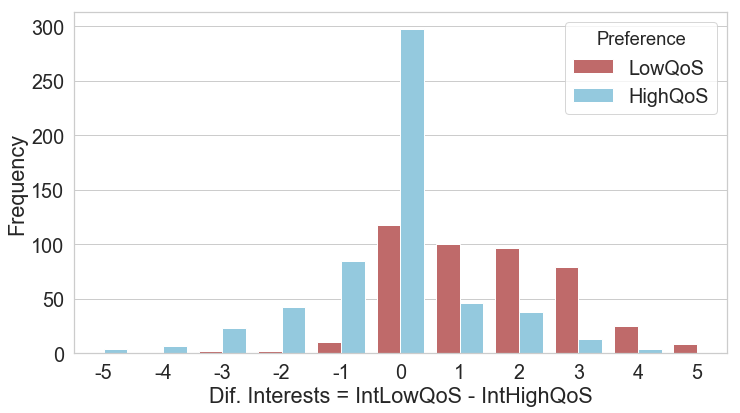

In [9]:
import seaborn as sns

In [39]:
def plotFrequency(feature, dataset, self_hue='', self_pallete='Set1', grid_type='darkgrid', font_size=1.8,
                  x_label = '', y_label = '', kwargs='', ):
    import seaborn as sns
    sns.set(style=grid_type, font_scale=font_size)
    if (self_hue!=''):
        ax = sns.countplot(x=feature, hue=self_hue, palette=['#CD5C5C','#87CEEB'], data=dataset)
    else:
        ax = sns.countplot(x=feature, color='darkblue', data=dataset)
        
    if (x_label != ''):
        ax.set(xlabel = x_label)
    if (y_label != ''):
        ax.set(ylabel = y_label)
    ax.set(ylabel = 'Frequência')
    return ax

In [102]:
# #Plot frequency
# feature_list = ['Stress', 'Annoyance', 'intLowQoS', 'intHighQoS', 'Dif_interests']
# for selector in feature_list:
#     plotFrequency(selector, dataset=df_filtered)

,0,1,2,3,4,5,6,7,8,9,10
Stress,16,27,24,41,42,97,80,146,241,124,107


In [149]:
pmfStress

,Stress
0,0.017964
1,0.026946
2,0.025948
3,0.046906
4,0.041916
5,0.096806
6,0.085828
7,0.152695
8,0.258483
9,0.139721


In [ ]:
pmfStress = pmf.to_frame()
pmfStress = pmfStress.transpose()

In [47]:
def plotPMF(data, variable, x_label='x', y_label='P (X = x)', barColor='gray', grid_type='white'):
    sns.set(style=grid_type, font_scale=1.8)
    pmf = feedbacks_stress[variable].value_counts().sort_index() / len(feedbacks_stress[variable])
    ax = pmf.plot(kind='bar', legend=True, color=barColor)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)    

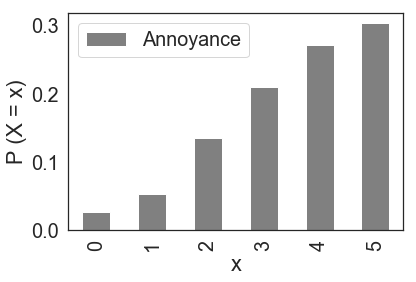

In [69]:
plotPMF(feedbacks_stress, 'Annoyance', grid_type='white')

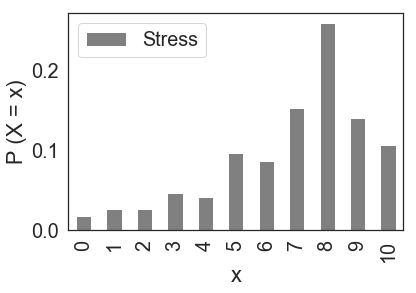

In [68]:
plotPMF(feedbacks_stress, 'Stress', grid_type='white')

In [57]:
plotFrequency('Stress', pmfStress, grid_type='white', x_label='x', y_label='P(X=x)')

NameError: name 'pmfStress' is not defined

,0,1,2,3,4,5,6,7,8,9,10
Stress,18,27,26,47,42,97,86,153,259,140,107


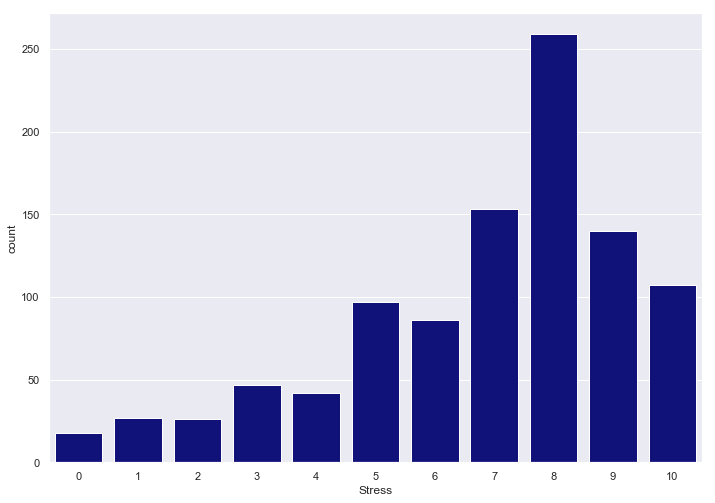

In [105]:
plotFrequency('Stress', df_filtered)
stress_frequency = pd.DataFrame(df_filtered.Stress.value_counts().sort_index())
display(stress_frequency.transpose())

,0,1,2,3,4,5
Annoyance,24,51,128,194,257,291


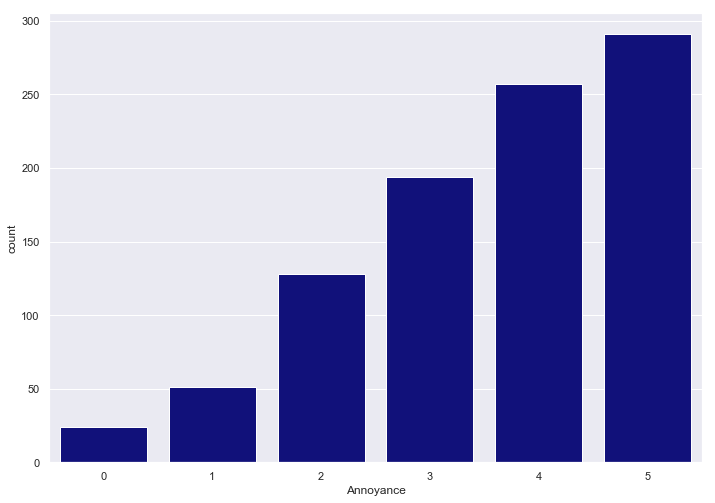

In [161]:
plotFrequency('Annoyance', df_filtered)
annoyance_frequency = pd.DataFrame(df_filtered.Annoyance.value_counts().sort_index())
display(annoyance_frequency.transpose())

,0,1,2,3,4,5
intLowQoS,46,82,119,199,274,225


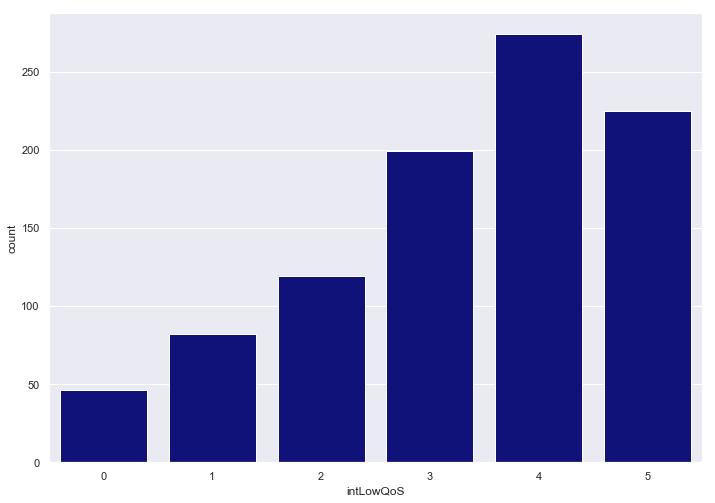

In [162]:
plotFrequency('intLowQoS', df_filtered)
lowQoS_frequency = pd.DataFrame(df_filtered.intLowQoS.value_counts().sort_index())
display(lowQoS_frequency.transpose())

,0,1,2,3,4,5
intHighQoS,83,141,173,210,188,150


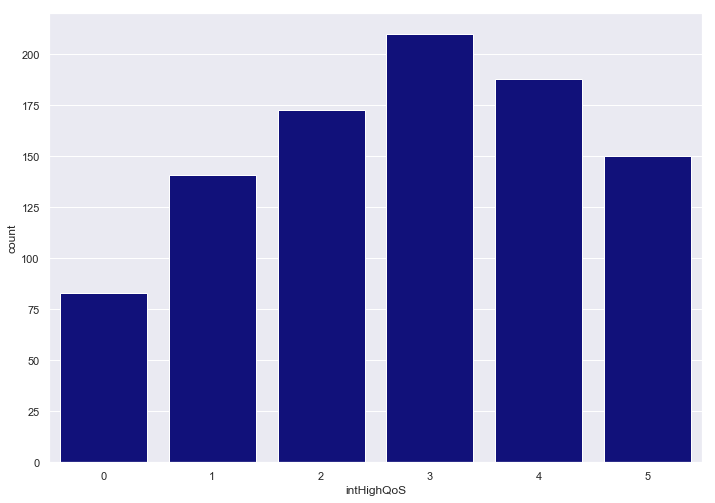

In [181]:
plotFrequency('intHighQoS', df_filtered)
highQoS_frequency = pd.DataFrame(df_filtered.intHighQoS.value_counts().sort_index())
display(highQoS_frequency.transpose())

,-5,-4,-3,-2,-1,0,1,2,3,4,5
Dif_interests,4,7,25,42,91,385,138,126,90,28,9


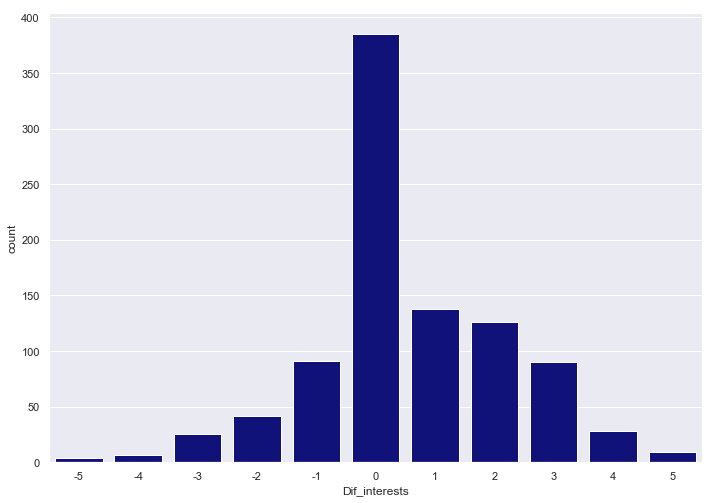

In [164]:
plotFrequency('Dif_interests', df_filtered)
dif_frequency = pd.DataFrame(df_filtered.Dif_interests.value_counts().sort_index())
display(dif_frequency.transpose())

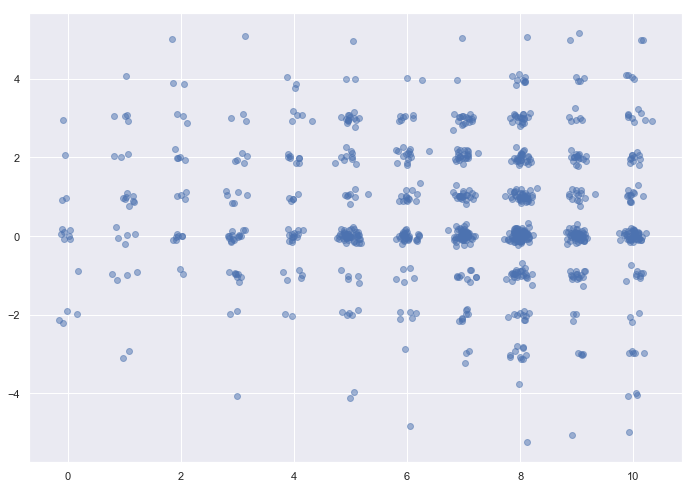

In [190]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o'):
    return plt.scatter(rand_jitter(x), rand_jitter(y), alpha=0.5)

jitter(df_filtered['Stress'], df_filtered['Dif_interests'])

In [203]:
.shape

SyntaxError: invalid syntax (<ipython-input-203-abefa8d9bb1a>, line 1)

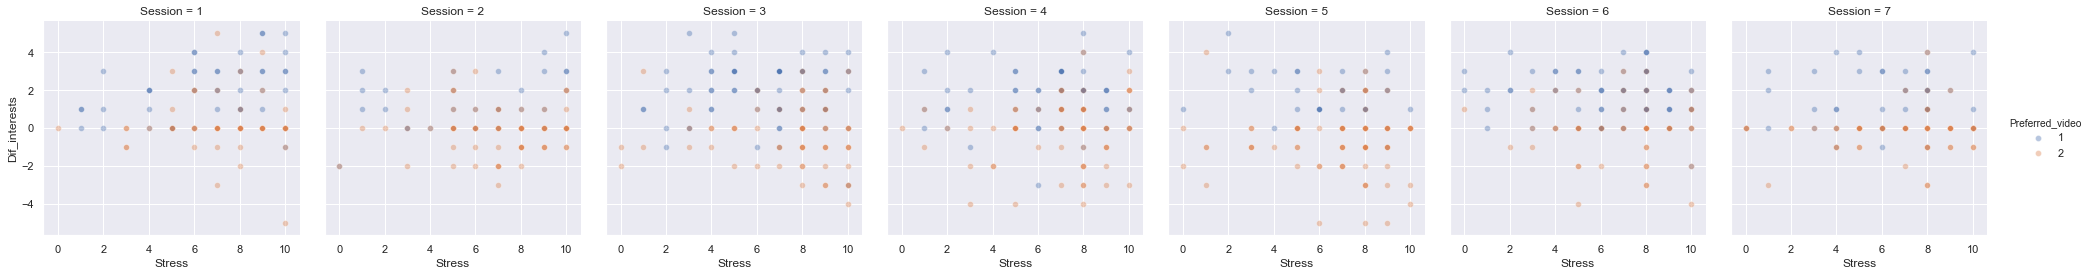

In [196]:
df_filtered
g = sns.FacetGrid(df_filtered[[, col="Session", hue='Preferred_video', height=4, aspect=1)
# g.map(sns.scatterplot, "Stress", "Dif_interests", x_jitter=0.25, y_jitter=0.25, scatter_kws={'s':6, 'alpha':0.3})
g.map(sns.scatterplot, "Stress", "Dif_interests", alpha=0.4)
g.add_legend();

In [ ]:
fe

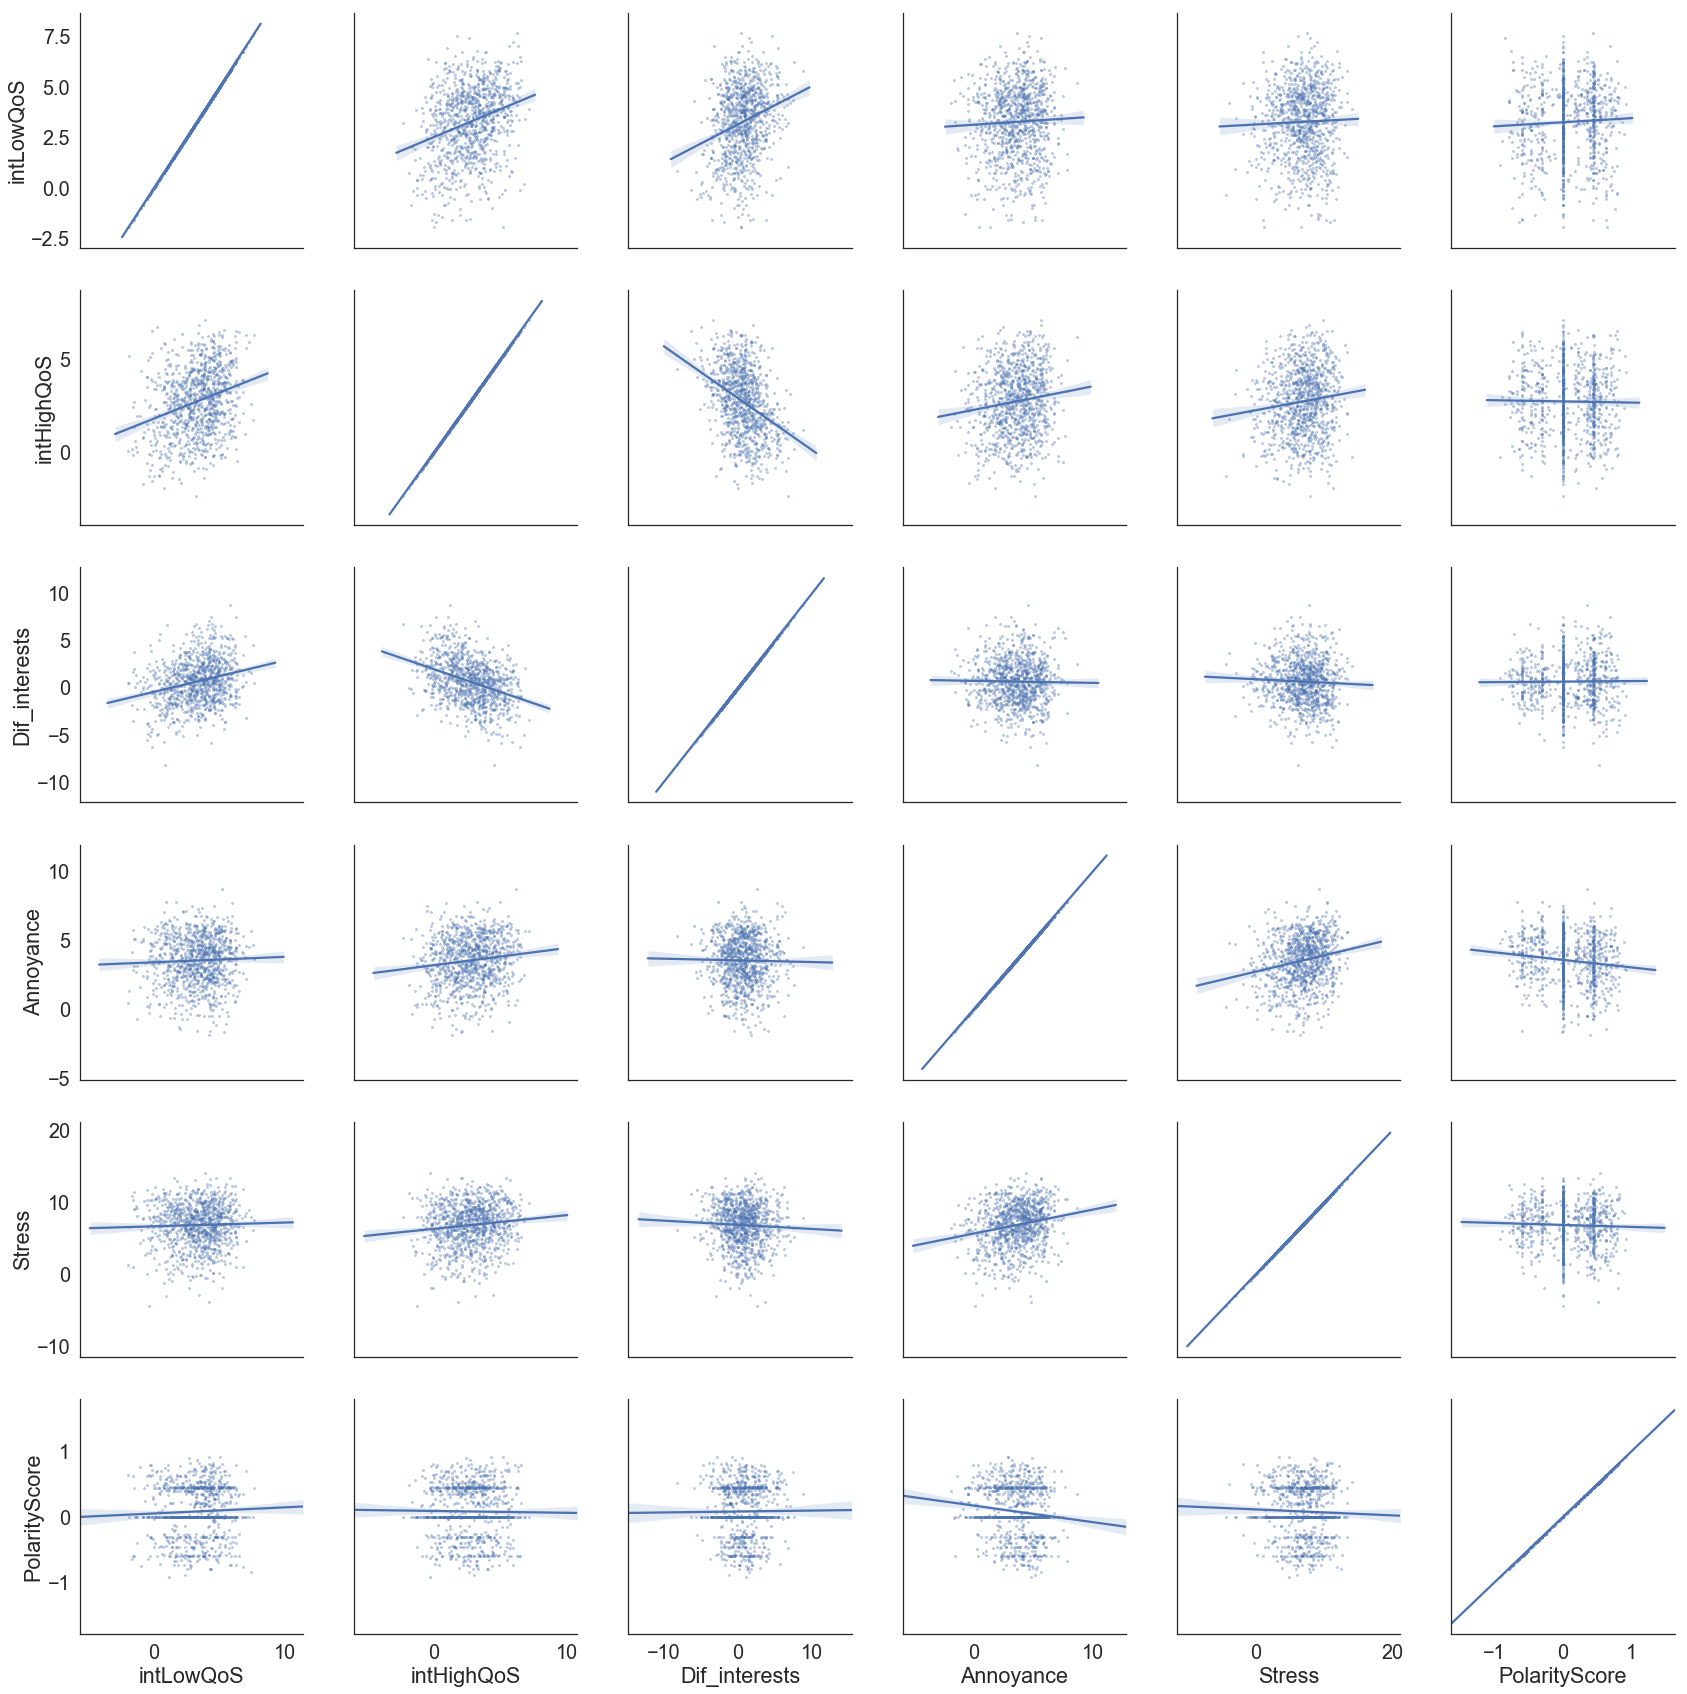

In [18]:
df_temp = pd.DataFrame(data=feedbacks_stress)
df_temp.Preferred_video.replace(1, 'lowQoS', inplace=True)
df_temp.Preferred_video.replace(2, 'highQoS', inplace=True)
df_temp.Annoyance = rand_jitter(df_temp['Annoyance'])
df_temp.Dif_interests = rand_jitter(df_temp['Dif_interests'])
df_temp.intLowQoS = rand_jitter(df_temp['intLowQoS'])
df_temp.intHighQoS = rand_jitter(df_temp['intHighQoS'])
df_temp.Stress = rand_jitter(df_temp['Stress'])


sns.set(rc={'figure.figsize':(11.7,8.27), 'font.size': 16})
sns.set(font_scale=1.8, style='white')
g = sns.PairGrid(df_temp[feature_list2], height=4)
g.map(sns.regplot, marker='o', scatter_kws={'s':4, 'alpha':0.3});

In [29]:
plotFrequency('Stress', df_filtered, self_hue='Preferred_video', grid_type='white')
pd.crosstab(df_filtered['Preferred_video'], df_filtered['Stress'], margins=True)

NameError: name 'df_filtered' is not defined

Annoyance,0,1,2,3,4,5,All
Preferred_video,,,,,,,
HighQoS,15,23,46,92,173,212,561
LowQoS,12,30,90,118,99,92,441
All,27,53,136,210,272,304,1002


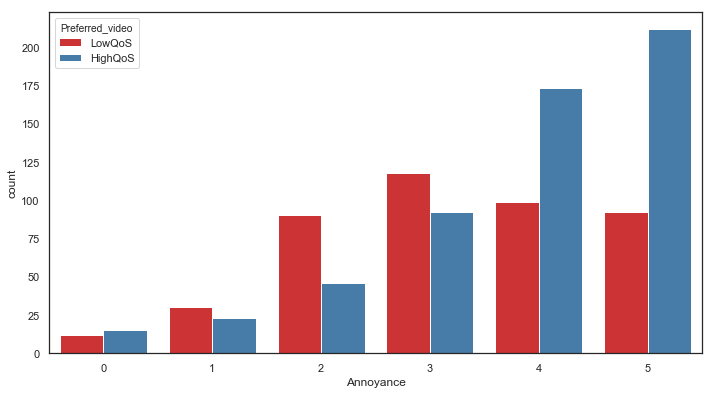

In [63]:
plotFrequency('Annoyance', df_filtered, self_hue='Preferred_video', grid_type='white')
pd.crosstab(df_filtered['Preferred_video'], df_filtered['Annoyance'], margins=True)

intLowQoS,0,1,2,3,4,5,All
Preferred_video,,,,,,,
HighQoS,41,64,84,146,130,96,561
LowQoS,6,23,40,77,161,134,441
All,47,87,124,223,291,230,1002


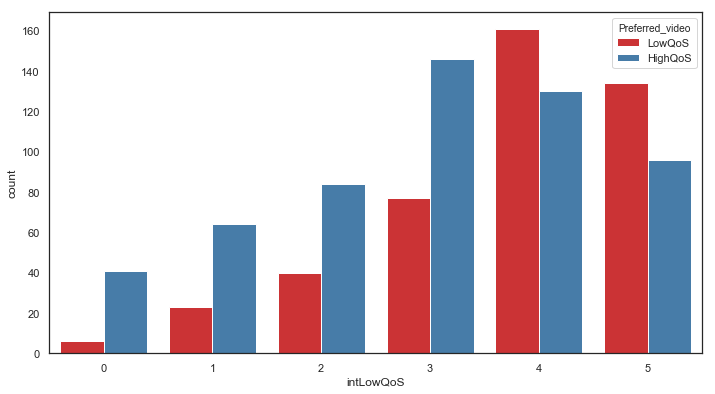

In [62]:
plotFrequency('intLowQoS', df_filtered, self_hue='Preferred_video', grid_type='white')
pd.crosstab(df_filtered['Preferred_video'], df_filtered['intLowQoS'], margins=True)

intHighQoS,0,1,2,3,4,5,All
Preferred_video,,,,,,,
HighQoS,33,49,79,145,143,112,561
LowQoS,52,100,103,91,57,38,441
All,85,149,182,236,200,150,1002


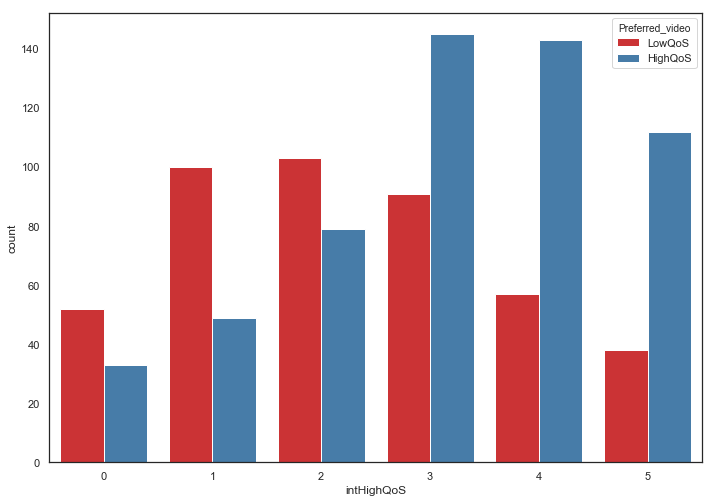

In [70]:
plotFrequency('intHighQoS', df_filtered, self_hue='Preferred_video', grid_type='white')
pd.crosstab(df_filtered['Preferred_video'], df_filtered['intHighQoS'], margins=True)

In [31]:
df_filtered = feedbacks_stress
df_filtered = df_filtered.rename(index=str, columns={"Dif_interests": "Dif. Interesse = Int. LowQoS - Int. HighQoS"})
df_filtered = df_filtered.rename(index=str, columns={"Preferred_video": "Preferência"})

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [53]:
for i in range (len(df_filtered.Preferred_video)):
    if (df_filtered.Preferred_video[i]==0):
        df_filtered.Preferred_video[i] = ['LowQoS'
    else:
        df_filtered.Preferred_video[i] = 'HighQoS'

In [88]:
df_filtered = df_filtered.replace({'Preference': 1}, 'LowQoS')
df_filtered = df_filtered.replace({'Preference': 2}, 'HighQoS')

In [5]:
# plotFrequency("Diference of interests (intLowQoS - intHighQoS))", df_filtered, self_hue='Preferred_video',
#               grid_type='white', y_label='Count')
# pd.crosstab(df_filtered['Preferred_video'], df_filtered["Diference of interests (intLowQoS - intHighQoS))"], margins=True)

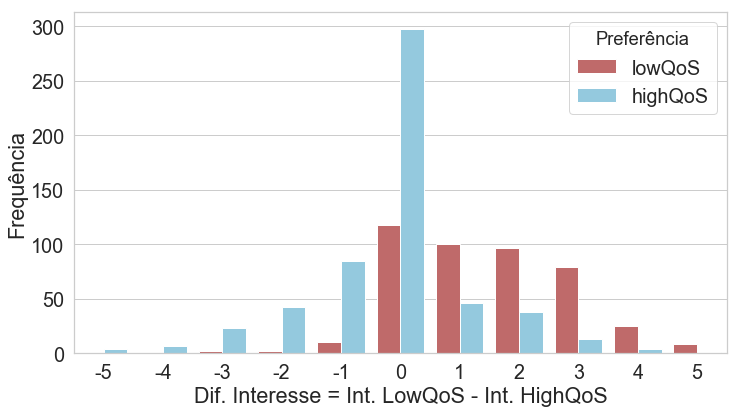

In [40]:
plotFrequency("Dif. Interesse = Int. LowQoS - Int. HighQoS", df_filtered, self_hue='Preferência',
              grid_type='whitegrid', y_label='Frequency')
ax = pd.crosstab(df_filtered['Preferência'], df_filtered["Dif. Interesse = Int. LowQoS - Int. HighQoS"], margins=True)
plt.savefig('frequency_preference.png', format='png', dpi=300)

In [68]:
temp1.describe()

,level_0,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0,118.000000,...,118.000000,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,435.601695,445.525424,519.338983,4.177966,3.415254,3.330508,3.330508,0.050847,1.0,1.923729,...,6.686441,0.0,0.172179,0.048992,0.644466,0.230246,-7.245763,-7.457627,7.245763,7.457627
std,307.790642,317.288262,347.832586,2.315431,1.269809,1.513783,1.513783,0.220623,0.0,0.266563,...,2.472755,0.0,0.307862,0.129848,0.333785,0.285890,8.034048,8.474844,8.034048,8.474844
min,5.000000,5.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,...,0.000000,0.0,-0.784500,0.000000,0.000000,0.000000,-43.000000,-45.000000,0.000000,0.000000
25%,175.000000,177.000000,219.500000,2.000000,2.000000,2.000000,2.000000,0.000000,1.0,2.000000,...,5.000000,0.0,0.000000,0.000000,0.428250,0.000000,-10.000000,-9.750000,2.000000,2.000000
50%,377.500000,383.500000,457.500000,4.000000,3.500000,4.000000,4.000000,0.000000,1.0,2.000000,...,7.000000,0.0,0.000000,0.000000,0.666000,0.125000,-5.000000,-5.000000,5.000000,5.000000
75%,679.000000,694.000000,792.000000,6.000000,4.750000,5.000000,5.000000,0.000000,1.0,2.000000,...,9.000000,0.0,0.440400,0.000000,1.000000,0.420000,-2.000000,-2.000000,10.000000,9.750000
max,1000.000000,1029.000000,1152.000000,7.000000,5.000000,5.000000,5.000000,1.000000,1.0,2.000000,...,10.000000,0.0,0.913400,0.750000,1.000000,1.000000,0.000000,0.000000,43.000000,45.000000


In [45]:
temp2.describe()

,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,User_Id,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
count,298.00000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.0,298.000000,298.000000,298.000000,298.0,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,518.66443,602.402685,4.114094,3.906040,3.174497,3.174497,0.083893,2.0,1.963087,256.416107,7.161074,0.0,-0.071315,0.182352,0.628215,0.108906,7.567114,7.825503,7.567114,7.825503
std,272.70449,298.297942,2.280145,1.249066,1.516382,1.516382,0.277693,0.0,0.188865,128.359769,2.220405,0.0,0.388029,0.295818,0.351865,0.213385,8.588058,9.069675,8.588058,9.069675
min,3.00000,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.000000,1.000000,0.000000,0.0,-0.909900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,304.25000,364.250000,2.000000,3.000000,2.000000,2.000000,0.000000,2.0,2.000000,163.000000,6.000000,0.0,-0.401900,0.000000,0.362250,0.000000,2.000000,2.000000,2.000000,2.000000
50%,511.00000,606.500000,4.000000,4.000000,3.000000,3.000000,0.000000,2.0,2.000000,264.500000,8.000000,0.0,0.000000,0.000000,0.707500,0.000000,4.000000,5.000000,4.000000,5.000000
75%,715.75000,819.250000,6.000000,5.000000,4.000000,4.000000,0.000000,2.0,2.000000,349.500000,9.000000,0.0,0.050175,0.315250,1.000000,0.127000,9.000000,10.000000,9.000000,10.000000
max,1030.00000,1153.000000,7.000000,5.000000,5.000000,5.000000,1.000000,2.0,2.000000,479.000000,10.000000,0.0,0.871900,1.000000,1.000000,1.000000,56.000000,60.000000,56.000000,60.000000


In [43]:
feedbacks_stress.describe()

,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,User_Id,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,511.931138,593.807385,4.078842,3.555888,3.311377,2.765469,0.056886,1.559880,1.964072,251.522954,6.848303,0.545908,0.087359,0.105512,0.641722,0.182902,1.099800,1.226547,7.475050,7.793413
std,298.318548,326.431335,2.032398,1.329512,1.416631,1.511820,0.231741,0.496649,0.186204,140.845690,2.420967,1.615481,0.375421,0.224729,0.328237,0.254110,10.713414,11.214625,7.749569,8.153267
min,0.000000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,-0.909900,0.000000,0.000000,0.000000,-45.000000,-45.000000,0.000000,0.000000
25%,254.250000,307.250000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,2.000000,136.000000,5.000000,0.000000,0.000000,0.000000,0.401000,0.000000,-4.000000,-4.000000,3.000000,2.000000
50%,507.500000,601.500000,4.000000,4.000000,4.000000,3.000000,0.000000,2.000000,2.000000,262.000000,8.000000,0.000000,0.000000,0.000000,0.698500,0.000000,2.000000,2.000000,5.000000,5.000000
75%,772.750000,870.750000,6.000000,5.000000,4.000000,4.000000,0.000000,2.000000,2.000000,370.750000,8.000000,2.000000,0.440400,0.099750,1.000000,0.326000,5.750000,6.000000,10.000000,10.000000
max,1030.000000,1153.000000,7.000000,5.000000,5.000000,5.000000,1.000000,2.000000,2.000000,479.000000,10.000000,5.000000,0.923100,1.000000,1.000000,1.000000,56.000000,60.000000,56.000000,60.000000


# =============

In [ ]:
#Create new features

In [48]:
#Import packages
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
nltk.download('vader_lexicon')

#Create dataframe that will hold the sentiment scores
df_sentiment = pd.DataFrame(columns=['PolarityScore','Negative','Neutral','Positive'])

#Declare sentiment object
sid = SentimentIntensityAnalyzer()

#Replace nan with empty string
feedbacks_stress = feedbacks_stress.replace(np.nan, '', regex=True)

#main loop; calculate polarity score and asign to each dataframe row
index = 0
for sentence in feedbacks_stress.Explanation_en:
    ss = sid.polarity_scores(sentence)
    df_sentiment.loc[index] = [ss['compound'], ss['neg'], ss['neu'], ss['pos']]
    index +=1    


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping sentiment\vader_lexicon.zip.


In [60]:
#Create text length variable
def countWords(input_data):
    import re

    df_word_length = pd.DataFrame(columns=['Text_Len_pt','Text_Len_en','Text_Len_pt(abs)','Text_Len_en(abs)'],
                                  index= range(input_data.shape[0]) )

    index = 0
    for sentence, video in zip(input_data.Explanation_en, input_data.Preferred_video):
        if (video==1):
            df_word_length.iloc[index]['Text_Len_en'] = len(re.findall(r'\w+', sentence))*(-1)
        else:
            df_word_length.iloc[index]['Text_Len_en'] = len(re.findall(r'\w+', sentence))
        index +=1

    #===

    index = 0
    for sentence, video in zip(input_data.Explanation_pt, input_data.Preferred_video):
        if (video==1):
            df_word_length.iloc[index]['Text_Len_pt'] = len(re.findall(r'\w+', sentence))*(-1)
        else:
            df_word_length.iloc[index]['Text_Len_pt'] = len(re.findall(r'\w+', sentence))
        index +=1


    df_word_length['Text_Len_en(abs)'] = abs(df_word_length.Text_Len_en)
    df_word_length['Text_Len_pt(abs)'] = abs(df_word_length.Text_Len_pt)
    
    return df_word_length


In [123]:
temp1 = feedbacks_stress[feedbacks_stress['Dif_interests']==0]
temp2 = feedbacks_stress[feedbacks_stress['Dif_interests']==0]
# temp1 = feedbacks_stress[feedbacks_stress['Dif_interests']<3]
# temp1 = temp1[temp1['Dif_interests']>=0]

# temp1 = temp1[temp1['Annoyance']>=3]
# temp2 = temp2[temp2['Annoyance']>=3]


temp1 = temp1[temp1['Preferred_video']==1]
temp2 = temp2[temp2['Preferred_video']==2]

temp1.reset_index(inplace=True)
temp2.reset_index(inplace=True)

In [92]:
np.mean(countWords(temp1)['Text_Len_en(abs)'])

6.627906976744186

In [93]:
np.mean(countWords(temp2)['Text_Len_en(abs)'])

7.708812260536399

In [94]:
temp1.describe()

,level_0,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000,...,86.000000,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,450.337209,460.732558,535.697674,4.162791,4.034884,3.511628,3.511628,0.034884,1.0,1.976744,...,7.000000,0.0,0.143042,0.049384,0.633767,0.223791,-6.523256,-6.627907,6.523256,6.627907
std,305.307082,315.014376,344.580566,2.320550,0.818142,1.386864,1.386864,0.184561,0.0,0.151599,...,2.331372,0.0,0.303786,0.132745,0.351041,0.293838,7.801548,8.280447,7.801548,8.280447
min,32.000000,32.000000,59.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.0,1.000000,...,1.000000,0.0,-0.784500,0.000000,0.000000,0.000000,-43.000000,-45.000000,0.000000,0.000000
25%,205.250000,207.250000,257.250000,2.000000,3.000000,3.000000,3.000000,0.000000,1.0,2.000000,...,6.000000,0.0,0.000000,0.000000,0.412500,0.000000,-7.000000,-8.000000,2.000000,2.000000
50%,371.500000,377.500000,451.500000,4.000000,4.000000,4.000000,4.000000,0.000000,1.0,2.000000,...,7.000000,0.0,0.000000,0.000000,0.653500,0.032500,-4.000000,-4.000000,4.000000,4.000000
75%,735.000000,755.250000,851.750000,6.000000,5.000000,5.000000,5.000000,0.000000,1.0,2.000000,...,9.000000,0.0,0.440400,0.000000,1.000000,0.427000,-2.000000,-2.000000,7.000000,8.000000
max,1000.000000,1029.000000,1152.000000,7.000000,5.000000,5.000000,5.000000,1.000000,1.0,2.000000,...,10.000000,0.0,0.796400,0.750000,1.000000,1.000000,0.000000,0.000000,43.000000,45.000000


In [95]:
temp2.describe()

,level_0,index,Id,Session,Annoyance,intLowQoS,intHighQoS,English,Preferred_video,Version,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0,261.000000,...,261.000000,261.0,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,509.478927,520.839080,604.942529,4.057471,4.279693,3.245211,3.245211,0.080460,2.0,1.969349,...,7.295019,0.0,-0.073114,0.185471,0.629931,0.111808,7.455939,7.708812,7.455939,7.708812
std,264.963489,273.216716,298.648315,2.305627,0.745712,1.483637,1.483637,0.272526,0.0,0.172702,...,2.101541,0.0,0.393291,0.297104,0.348118,0.216049,8.132731,8.512405,8.132731,8.512405
min,3.000000,3.000000,28.000000,1.000000,3.000000,0.000000,0.000000,0.000000,2.0,1.000000,...,0.000000,0.0,-0.909900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,304.000000,309.000000,369.000000,2.000000,4.000000,2.000000,2.000000,0.000000,2.0,2.000000,...,6.000000,0.0,-0.421500,0.000000,0.366000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,499.000000,506.000000,600.000000,4.000000,4.000000,3.000000,3.000000,0.000000,2.0,2.000000,...,8.000000,0.0,0.000000,0.000000,0.699000,0.000000,5.000000,5.000000,5.000000,5.000000
75%,701.000000,716.000000,820.000000,6.000000,5.000000,4.000000,4.000000,0.000000,2.0,2.000000,...,9.000000,0.0,0.077200,0.329000,1.000000,0.142000,9.000000,10.000000,9.000000,10.000000
max,1001.000000,1030.000000,1153.000000,7.000000,5.000000,5.000000,5.000000,1.000000,2.0,2.000000,...,10.000000,0.0,0.871900,1.000000,1.000000,1.000000,45.000000,48.000000,45.000000,48.000000


In [73]:
df_final = feedbacks_stress.append(df_sentiment)
df_final

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Annoyance,Comment_en,Commment_pt,Created_date,Dif_interests,Email,English,Explanation_en,Explanation_pt,Id,...,Published_date_x,Sentence,Session,Session_key,Stress,User_Id,Version,index,intHighQoS,intLowQoS
0,1.0,I found this comparison interesting that you a...,achei interessante essa comparação que vocês e...,2018-02-27 14:21:00,2.0,sadoc@dcc.ufrj.br,0.0,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,21.0,...,2018-02-27 14:21:00,NaN,1.0,,7.0,25.0,1.0,0.0,1.0,3.0
1,3.0,"the flaws were perceptible, but even so I like...","as falhas foram perceptíveis, mas mesmo assim ...",2018-06-01 18:45:15,2.0,sadoc@dcc.ufrj.br,0.0,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",102.0,...,2018-06-01 18:45:15,NaN,6.0,,7.0,25.0,2.0,1.0,3.0,5.0
2,4.0,,,2018-06-01 18:48:36,3.0,sadoc@dcc.ufrj.br,0.0,it's a lot more fun,é muito mais divertido,103.0,...,2018-06-01 18:48:36,NaN,2.0,,7.0,25.0,2.0,2.0,1.0,4.0
3,3.0,,,2018-06-01 18:51:08,0.0,sadoc@dcc.ufrj.br,0.0,because it had fewer interruptions,porque teve menos interrupções,104.0,...,2018-06-01 18:51:08,NaN,5.0,,7.0,25.0,2.0,3.0,4.0,4.0
4,5.0,I hated video 2,Detestei o vídeo 2,2018-03-05 23:00:43,0.0,mattgouvea@gmail.com,0.0,Because he had no interruptions.,Porque não teve interrupções.,28.0,...,2018-03-05 23:00:43,NaN,1.0,,10.0,1.0,1.0,4.0,2.0,2.0
5,0.0,The interruptions do not bother me as much as ...,As interrupções não me incomodaram tanto pois ...,2018-03-05 23:04:09,0.0,mattgouvea@gmail.com,0.0,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",29.0,...,2018-03-05 23:04:09,NaN,2.0,,10.0,1.0,1.0,5.0,0.0,0.0
6,5.0,My sense of humor spoke louder and I was not p...,Meu senso de humor falou mais alto e eu não es...,2018-03-05 23:09:58,3.0,mattgouvea@gmail.com,0.0,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,30.0,...,2018-03-05 23:09:58,NaN,3.0,,10.0,1.0,1.0,6.0,0.0,3.0
7,0.0,I'm not interested in the topic of any of the ...,Não me interesso pelo tópico de nenhum dos víd...,2018-03-05 23:16:04,0.0,mattgouvea@gmail.com,0.0,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,31.0,...,2018-03-05 23:16:04,NaN,4.0,,10.0,1.0,1.0,7.0,0.0,0.0
8,4.0,I began to notice that random videos do not in...,Comecei a reparar que vídeos aleatórios não me...,2018-03-05 23:27:33,0.0,mattgouvea@gmail.com,0.0,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,32.0,...,2018-03-05 23:27:33,NaN,5.0,,10.0,1.0,1.0,8.0,0.0,0.0
9,5.0,"There was an interruption in the video, at a c...","Teve uma interrupção no vídeo, num momento cru...",2018-03-05 23:32:57,0.0,mattgouvea@gmail.com,0.0,Because you gave me more relevant information,Porque me deu informações mais relevantes,33.0,...,2018-03-05 23:32:57,NaN,6.0,,10.0,1.0,1.0,9.0,2.0,2.0


In [79]:
writer = pd.ExcelWriter('Dataset-updated.xlsx')
df_final.to_excel(writer,'Dataset')
writer.save()

In [7]:
feedbacks_stress

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
0,0,21,1,It's always better to see Brazil win.,sempre melhor ver o Brasil ganhar,2018-02-27 14:21:00,2018-02-27 14:21:00,1,3,1,...,7,2,0.4404,0.000,0.674,0.326,-6,-8,6,8
1,1,102,6,"because even with interruptions, I found it mo...","porque mesmo com as interrupções, achei mais v...",2018-06-01 18:45:15,2018-06-01 18:45:15,3,5,3,...,7,2,0.2484,0.218,0.484,0.298,-8,-9,8,9
2,2,103,2,it's a lot more fun,é muito mais divertido,2018-06-01 18:48:36,2018-06-01 18:48:36,4,4,1,...,7,3,0.5563,0.000,0.455,0.545,-4,-6,4,6
3,3,104,5,because it had fewer interruptions,porque teve menos interrupções,2018-06-01 18:51:08,2018-06-01 18:51:08,3,4,4,...,7,0,-0.4019,0.403,0.597,0.000,4,5,4,5
4,4,28,1,Because he had no interruptions.,Porque não teve interrupções.,2018-03-05 23:00:43,2018-03-05 23:00:43,5,2,2,...,10,0,-0.2960,0.355,0.645,0.000,4,5,4,5
5,5,29,2,"From my sense of humor, this video was funnier.","Pelo meu senso de humor, esse vídeo foi mais e...",2018-03-05 23:04:09,2018-03-05 23:04:09,0,0,0,...,10,0,0.2732,0.000,0.792,0.208,-10,-9,10,9
6,6,30,3,Because it had no interruptions and was funnier.,Porque não teve interrupções e era mais engraç...,2018-03-05 23:09:58,2018-03-05 23:09:58,5,3,0,...,10,3,-0.5994,0.450,0.550,0.000,8,8,8,8
7,7,31,4,Because it was an unusual scene that surprised me,Porque foi uma cena inusitada que me surpreendeu,2018-03-05 23:16:04,2018-03-05 23:16:04,0,0,0,...,10,0,0.2263,0.000,0.808,0.192,-8,-9,8,9
8,8,32,5,I found it cool to watch a video of a good per...,Achei legal assistir um vídeo de uma pessoa bo...,2018-03-05 23:27:33,2018-03-05 23:27:33,4,0,0,...,10,0,0.6369,0.000,0.698,0.302,13,17,13,17
9,9,33,6,Because you gave me more relevant information,Porque me deu informações mais relevantes,2018-03-05 23:32:57,2018-03-05 23:32:57,5,2,2,...,10,0,0.0000,0.000,1.000,0.000,6,7,6,7


In [10]:
feedbacks_stress = feedbacks_stress.drop(columns=['index', 'Id'])

In [8]:
feature_list2 = ["intLowQoS", "intHighQoS", "Dif_interests", "Annoyance", "Stress", "PolarityScore"]


In [14]:
cor

,intLowQoS,intHighQoS,Dif_interests,Annoyance,Stress,PolarityScore,Text_Len_en(abs)
intLowQoS,1.000000,0.392836,0.509281,0.083574,0.039420,0.042969,0.063525
intHighQoS,0.392836,1.000000,-0.591351,0.191668,0.085528,-0.019172,0.044855
Dif_interests,0.509281,-0.591351,1.000000,-0.106082,-0.045472,0.055621,0.013728
Annoyance,0.083574,0.191668,-0.106082,1.000000,0.313010,-0.160495,-0.039715
Stress,0.039420,0.085528,-0.045472,0.313010,1.000000,-0.029794,-0.033980
PolarityScore,0.042969,-0.019172,0.055621,-0.160495,-0.029794,1.000000,0.008670
Text_Len_en(abs),0.063525,0.044855,0.013728,-0.039715,-0.033980,0.008670,1.000000


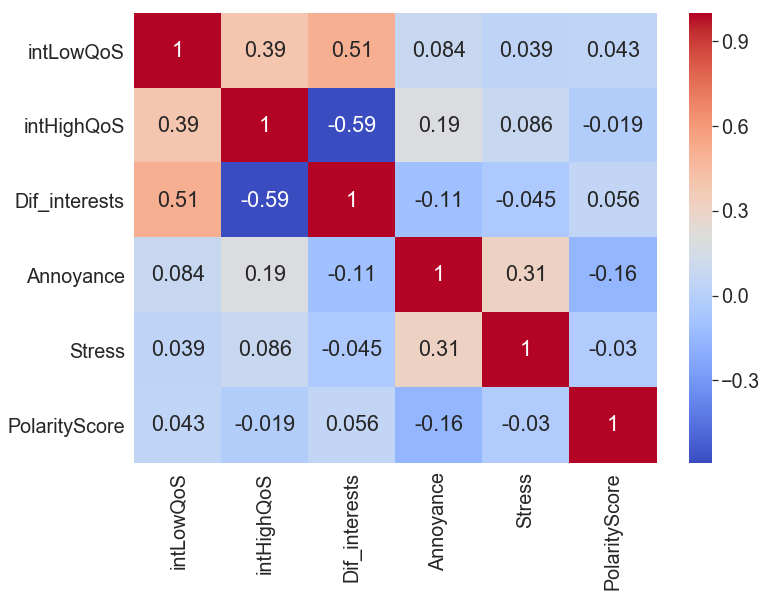

In [127]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27), 'font.size': 16})
sns.set(font_scale=1.8, style='white')
cor = feedbacks_stress[feature_list2].corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")

In [233]:
def calculateIntervalConfidence(data, index=0):
    import statsmodels.stats.api as sms
    temp_data = [x[index] for x in [tree.feature_importances_ for tree in data]]
    return sms.DescrStatsW(temp_data).tconfint_mean()[1] - np.mean(temp_data)

In [72]:
forest1.estimators_[0].feature_importances_[0]

0.07689762928984545

In [73]:
df_importance2

,Importance,Class,Feature
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [98]:
forest1.estimators_[99]

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0017, min_impurity_split=None,
          min_samples_leaf=15, min_samples_split=20,
          min_weight_fraction_leaf=0.0, random_state=1396067212,
          splitter='random')

In [18]:
def fillDataframe(data, forest, index=0, class_hue='Whole data'):
    aux=0
    for i in range(index, index+400, 4):
        data.iloc[i] = [forest.estimators_[aux].feature_importances_[0], class_hue, 'Annoyance']
        data.iloc[i+1] = [forest.estimators_[aux].feature_importances_[1], class_hue, 'Dif_interests']
        data.iloc[i+2] = [forest.estimators_[aux].feature_importances_[2], class_hue, 'Stress']
        data.iloc[i+3] = [forest.estimators_[aux].feature_importances_[3], class_hue, 'PolarityScore']
        aux+=1
        
    return data

def fillDataframe2(data, forest, index=0, class_hue='Completo'):
    aux=0
    for i in range(index, index+400, 4):
        data.iloc[i] = [forest.estimators_[aux].feature_importances_[0], class_hue, 'Incômodo']
        data.iloc[i+1] = [forest.estimators_[aux].feature_importances_[1], class_hue, 'Dif. interesse']
        data.iloc[i+2] = [forest.estimators_[aux].feature_importances_[2], class_hue, 'Estresse']
        data.iloc[i+3] = [forest.estimators_[aux].feature_importances_[3], class_hue, 'Polaridade']
        aux+=1
        
    return data

In [100]:
df_importance2 = pd.DataFrame(index=range(800), columns=['Importance', 'Class', 'Feature'])
df_importance2 = fillDataframe(df_importance2, forest=forest1)
df_importance2 = fillDataframe(df_importance2, forest=forest2, index=400, class_hue='Without outliers')

In [106]:
df_importance2 = fillDataframe(df_importance2)
df_importance2 = fillDataframe(df_importance2, index=400, class_hue='Without outliers')

In [107]:
df_importance2

,Importance,Class,Feature
0,0.0768976,Whole data,Annoyance
1,0,Whole data,Dif_interests
2,0.233901,Whole data,Stress
3,0.689202,Whole data,PolarityScore
4,0,Whole data,Annoyance
5,1,Whole data,Dif_interests
6,0,Whole data,Stress
7,0,Whole data,PolarityScore
8,0.0395679,Whole data,Annoyance
9,0.864414,Whole data,Dif_interests


Feature ranking:
Dif_interests: 0.47173616893527276
PolarityScore: 0.2379816439577828
Annoyance: 0.11807425701269643
Stress: 0.012207930094247945


Score: 0.808235294117647


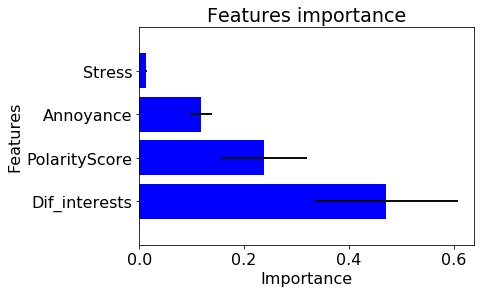

In [3]:
#Random Forest and Feature Importance


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Backup=============================================================================
forest = ExtraTreesClassifier(n_estimators=100,
                             random_state=0,
                             min_samples_split=20, min_samples_leaf=15, max_depth=5,
                             min_impurity_decrease=0.0017, class_weight='balanced')
#=================================================================================

feature_name = ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore']
X = feedbacks_stress[feature_name]
y = feedbacks_stress['Preferred_video']
# Build a forest and compute the feature importances
# forest = ExtraTreesClassifier(n_estimators=100,
#                               random_state=0,
#                               min_samples_split=5, min_samples_leaf=5, max_depth=7,
#                               min_impurity_decrease=0.00001, class_weight='balanced')

# forest = ExtraTreesClassifier(n_estimators=100,
#                               random_state=0)

forest.fit(X, y)
scores = cross_val_score(forest, X, y, cv=10)
importances = forest.feature_importances_
error = np.var([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# error = np.array( [calculateIntervalConfidence(forest.estimators_,i) for i in range (len(feature_name))] )
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(feature_name[indices[f]]+": "+str(importances[indices[f]]))
    
print("\n======================\n")

print("Score: "+ str(scores.mean()))    
# predicted = forest.predict(X)
# print("Accuracy: "+ str(accuracy_score(y, predicted)))    


#Order plot name
ordered_name = []
for i in range (len(feature_name)):
    ordered_name += [feature_name[indices[i]]]
ordered_name

# Plot the feature importances of the forest
plt.rcParams.update({'font.size': 16})
plt.figure()
plt.title("Features importance")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=error[indices], align="center")
# plt.barh(range(X.shape[1]), importances[indices],
#        color="b", xerr=error[indices], align="center")
plt.yticks(range(X.shape[1]), ordered_name, rotation='horizontal')
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Feature ranking:
Dif_interests: 0.615996709976083
Annoyance: 0.20877756404526251
PolarityScore: 0.14893897325330718
Stress: 0.026286752725347418


Score: 0.8567275569242254


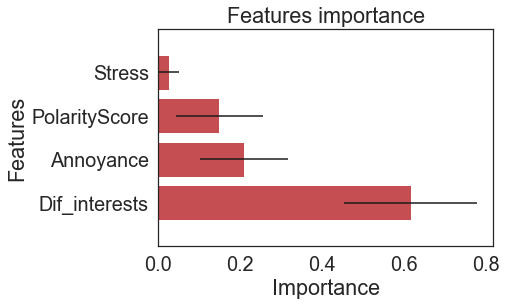

In [281]:
#Random Forest and Feature Importance


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


"""X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)
"""

feature_name = ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore']
X = feedbacks_outlier[feature_name]
y = feedbacks_outlier['Preferred_video']
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0,
                              min_samples_split=5, min_samples_leaf=5, max_depth=7,
                              min_impurity_decrease=0.00001, class_weight='balanced')

# forest = ExtraTreesClassifier(n_estimators=100,
#                               random_state=0)

forest.fit(X, y)
scores = cross_val_score(forest, X, y, cv=10)
importances = forest.feature_importances_
error = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# error = np.array( [calculateIntervalConfidence(forest.estimators_,i) for i in range (len(feature_name))] )

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(feature_name[indices[f]]+": "+str(importances[indices[f]]))
    
print("\n======================\n")

print("Score: "+ str(scores.mean()))    
# predicted = forest.predict(X)
# print("Accuracy: "+ str(accuracy_score(y, predicted)))    


#Order plot name
ordered_name = []
for i in range (len(feature_name)):
    ordered_name += [feature_name[indices[i]]]
ordered_name

# Plot the feature importances of the forest
plt.rcParams.update({'font.size': 16})
plt.figure()
plt.title("Features importance")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=error[indices], align="center")
plt.yticks(range(X.shape[1]), ordered_name, rotation='horizontal')
plt.ylim([-1, X.shape[1]])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Text(0.5,1,'Importância das variáveis')

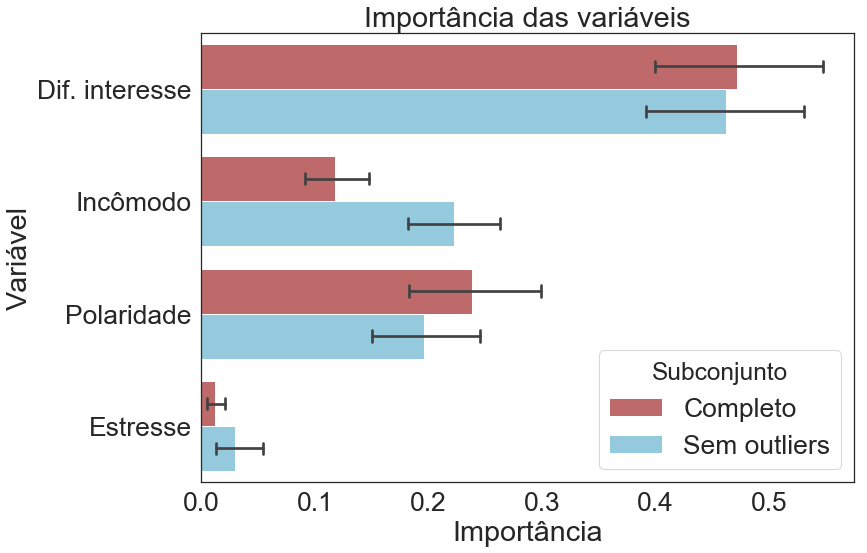

In [19]:
#Random Forest and Feature Importance


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Backup=============================================================================
forest1 = ExtraTreesClassifier(n_estimators=100,
                             random_state=0,
                             min_samples_split=20, min_samples_leaf=15, max_depth=5,
                             min_impurity_decrease=0.0017, class_weight='balanced')
forest2 = ExtraTreesClassifier(n_estimators=100,
                             random_state=0,
                             min_samples_split=20, min_samples_leaf=15, max_depth=5,
                             min_impurity_decrease=0.0017, class_weight='balanced')
#=================================================================================

feature_name = ['Annoyance', 'Dif_interests', 'Stress', 'PolarityScore']
X1 = feedbacks_stress[feature_name]
y1 = feedbacks_stress['Preferred_video']
X2 = feedbacks_outlier[feature_name]
y2 = feedbacks_outlier['Preferred_video']

forest1.fit(X1, y1)
scores1 = cross_val_score(forest1, X1, y1, cv=10)
importances1 = forest1.feature_importances_
error1 = np.var([tree.feature_importances_ for tree in forest1.estimators_], axis=0)
indices1 = np.argsort(importances1)[::-1]

forest2.fit(X2, y2)
scores2 = cross_val_score(forest1, X2, y2, cv=10)
importances2 = forest2.feature_importances_
error2 = np.var([tree.feature_importances_ for tree in forest2.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

# Print the feature ranking
# print("Feature ranking 1:")
# for f in range(X1.shape[1]):
#     print(feature_name[indices1[f]]+": "+str(importances1[indices1[f]]))
# print("\n======================\n")
# print("Score: "+ str(scores1.mean()))    
# print('\n======================\n')
# print("Feature ranking 2:")
# for f in range(X2.shape[1]):
#     print(feature_name[indices2[f]]+": "+str(importances2[indices2[f]]))
# print("\n======================\n")
# print("Score: "+ str(scores2.mean()))    


#Order plot name
ordered_name = []
for i in range (len(feature_name)):
    ordered_name += [feature_name[indices1[i]]]
ordered_name

# Plot the feature importances of the forest


df_importance2 = pd.DataFrame(index=range(800), columns=['Importância', 'Subconjunto', 'Variável'])
df_importance2 = fillDataframe2(df_importance2, forest=forest1)
df_importance2 = fillDataframe2(df_importance2, forest=forest2, index=400, class_hue='Sem outliers')


sns.set(rc={'figure.figsize':(11.7,8.27), 'font.size': 16})
sns.set(font_scale=2.4, style='white')

colors = sns.color_palette(['#CD5C5C','#87CEEB'], n_colors=2)
ax = sns.barplot(x="Importância", y="Variável", hue='Subconjunto', order=['Dif. interesse', 'Incômodo', 'Polaridade', 'Estresse'],
                 capsize=.1, palette =colors,
                 data=df_importance2)

ax.set_title("Importância das variáveis")

# sns.set.rcParams.update({'font.size': 16})
# ax.title("Features importance")


# plt.rcParams.update({'font.size': 16})
# plt.figure()
# plt.title("Features importance")

# plt.barh(range(X.shape[1]), importances[indices],
#        color="r", xerr=error[indices], align="center")

# plt.barh(range(X1.shape[1]), 'Importance',
#        color="r", xerr='Error', hue='Class', data=df_importance, align="center")

# plt.yticks(range(X1.shape[1]), ordered_name, rotation='horizontal')
# plt.ylim([-1, X.shape[1]])
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()

In [70]:
df_importance

,Importance,Error,Class,Feature
0,0.471736,0.136655,Complete data,Dif_interests
1,0.237982,0.081361,Complete data,PolarityScore
2,0.118074,0.021350,Complete data,Annoyance
3,0.012208,0.001781,Complete data,Stress
4,0.462096,0.122930,Outliers removed,Dif_interests
5,0.196347,0.063649,Outliers removed,PolarityScore
6,0.222167,0.046883,Outliers removed,Annoyance
7,0.029389,0.012029,Outliers removed,Stress


In [43]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [32]:
list(importances1[indices1]) + list(importances2[indices1])

[0.47173616893527276,
 0.2379816439577828,
 0.11807425701269643,
 0.012207930094247945,
 0.46209642278379465,
 0.2221669514970127,
 0.196347135260408,
 0.029389490458784785]

In [58]:
df_importance2 = pd.DataFrame(index=range(2000), columns=['Importance', 'Class', 'Feature'])
df_importance2

,Importance,Class,Feature
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [51]:
df_importance = pd.DataFrame(data={'Importance': list(importances1[indices1]) + list(importances2[indices1]),
                                   'Error':list(error1[indices1]) + list(error2[indices1]),
                                   'Class': ['Complete data', 'Complete data', 'Complete data', 'Complete data',
                                             'Outliers removed', 'Outliers removed', 'Outliers removed', 'Outliers removed'],
                                    'Feature':ordered_name+ordered_name})

In [21]:
df_importance = pd.DataFrame(data={'Importance1': importances1[indices1], 'Importance2': importances2[indices1],
                                   'Error1': error1[indices1], 'Error2': error2[indices2],
                                   'Feature': ordered_name, ''})

In [49]:
ordered_name+ordered_name

['Dif_interests',
 'PolarityScore',
 'Annoyance',
 'Stress',
 'Dif_interests',
 'PolarityScore',
 'Annoyance',
 'Stress']

In [52]:
df_importance

,Importance,Error,Class,Feature
0,0.471736,0.136655,Complete data,Dif_interests
1,0.237982,0.081361,Complete data,PolarityScore
2,0.118074,0.021350,Complete data,Annoyance
3,0.012208,0.001781,Complete data,Stress
4,0.462096,0.122930,Outliers removed,Dif_interests
5,0.196347,0.063649,Outliers removed,PolarityScore
6,0.222167,0.046883,Outliers removed,Annoyance
7,0.029389,0.012029,Outliers removed,Stress


In [306]:
feedbacks_stress[feedbacks_stress.Annoyance==2]

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)


In [6]:
df_temp = pd.DataFrame(data=feedbacks_stress)
df_temp.Preferred_video.replace(1, 'lowQoS', inplace=True)
df_temp.Preferred_video.replace(2, 'highQoS', inplace=True)

df_temp.Annoyance = rand_jitter(df_temp['Annoyance'])
df_temp.Dif_interests = rand_jitter(df_temp['Dif_interests'])

In [1]:
def abline(slope, intercept, line_type, line_color):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, line_type, color=line_color, linewidth=2.0)
    return [x_vals, y_vals]

In [9]:
def getLine(slope, intercept):
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', linewidth=3.0)
    return [x_vals, y_vals]

In [78]:
#Prepare Data
df_temp = feedbacks_stress.copy()
df_temp.Preferred_video.replace(1, 'lowQoS', inplace=True)
df_temp.Preferred_video.replace(2, 'highQoS', inplace=True)

# df_temp.Annoyance = rand_jitter(df_temp['Annoyance'])
# df_temp.Dif_interests = rand_jitter(df_temp['Dif_interests'])    

noise1 = np.random.normal(loc=0, scale=0.2, size=1002)
noise2 = np.random.normal(loc=0, scale=0.2, size=1002)
df_temp.Annoyance = df_temp.Annoyance + noise1
df_temp.Dif_interests = df_temp.Dif_interests + noise2


In [107]:
print(slope)
print(intercept)

3.332841900456374
[1.97281074]


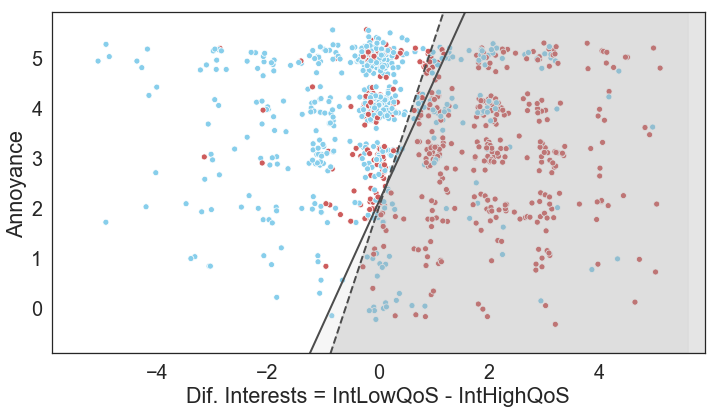

In [109]:
#Scatter plots
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,6.27), 'font.size': 16})
sns.set(font_scale=1.8, style='white')
colors = sns.color_palette(['#CD5C5C', '#87CEEB'], n_colors=2)
# marker = {'lowQoS': "s", 'highQoS': "X"}
marker_style = dict(color='cornflowerblue', linestyle=':', marker='o')

ax = sns.scatterplot(x="Dif_interests", y="Annoyance", hue='Preferred_video', palette=colors, legend=False,
                     data=df_temp, style='Preferred_video', markers=False)

line1 = abline(2.426 , 2.096, '-', '#4c4c4c')
line2 = abline(slope, intercept, '--', '#4c4c4c')
line1 = plt.fill_between(line1[0], line1[1], -0.9, alpha=0.2, color='lightgray')
line2 = plt.fill_between(line2[0], line2[1], -0.9, alpha=0.2, color='gray')

axes = ax.axes
axes.set_ylim(-.9, 5.9)
axes.set_xlim(-5.9, 5.9)
ax.set_xlabel('Dif. Interests = IntLowQoS - IntHighQoS')

plt.savefig('scatter_plot_big.png', format='png', dpi=300)

In [347]:
noise = np.random.normal(loc=0, scale=0.2, size=943)


In [429]:
noise = np.random.normal(loc=0, scale=0.2, size=943)
# a = feedbacks_outlier.Annoyance
# b = .04*(max(a)-min(a))
# c = a + np.random.randn(len(a)) * b
c = a + noise
c

0       1.041245
1       3.136162
2       3.949034
3       3.038819
4       5.015981
5       0.198217
6       5.033948
7       0.060255
8       4.257203
9       5.131970
10      0.854202
11      1.820151
12      1.259967
13      0.968476
14      2.083042
15      1.989524
16      2.714835
17      2.666897
18      3.956858
19      4.127920
20      3.841024
21      4.816496
22      5.222188
23      2.794393
24      4.224299
25      1.923487
26      4.045165
27     -0.334780
28      2.040005
29      0.019408
          ...   
970     2.062477
971     4.120462
972     5.027762
973     4.810299
974     2.682637
975     4.773636
976     5.151747
977     5.061144
978     2.292133
979     4.666404
980     1.712342
981     2.215509
982     1.576355
983     2.299421
984     3.423453
986     1.796334
987     3.345110
988     0.600308
989     2.846760
990     3.025213
991     2.315767
992     5.045071
993     0.967685
994     0.919982
995     2.799818
996     3.284181
997     3.507079
998     3.2520

In [5]:
def rand_jitter(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(rand_jitter(x), rand_jitter(y), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin,
                   vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)

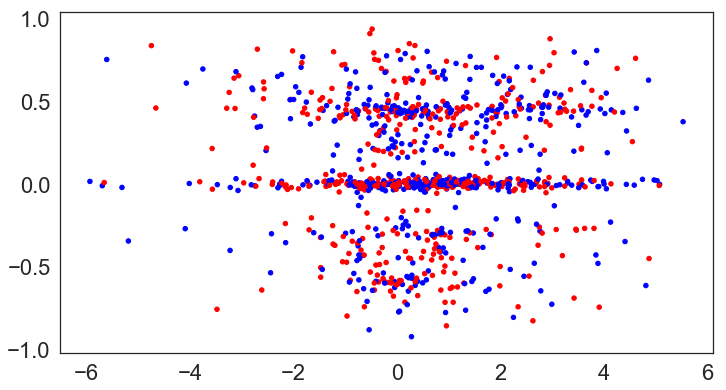

In [464]:
jitter(feedbacks_stress['Dif_interests'], feedbacks_stress['PolarityScore'], c=['red', 'blue'])

In [5]:
intercept

array([1.97281074])

In [6]:
slope

3.332841900456374

In [4]:
from sklearn.linear_model import LogisticRegression
X = feedbacks_stress[['Dif_interests', 'Annoyance', 'Stress', 'PolarityScore']]
y = feedbacks_stress['Preferred_video']
lg_clf = LogisticRegression(random_state=0, solver='lbfgs', class_weight='balanced', tol=0.000001, dual=False, C=0.9, 
                         multi_class='multinomial').fit(X, y)

from sklearn.metrics import accuracy_score

intercept = -lg_clf.intercept_ / lg_clf.coef_[0][1]
slope =  -lg_clf.coef_[0][0] / lg_clf.coef_[0][1]

accuracy_score(y, lg_clf.predict(X))


0.779441117764471

In [456]:
accuracy_score(y, lg_clf.predict(X))


0.779441117764471

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y, lg_clf.predict(X))

0.7764471057884231

In [ ]:
intercept = -lg_clf.intercept / lg_clf.coef_[1]
slope =  -lg_clf.coef_[0] / lg_clf.coef_[1]

In [91]:
lg_clf.coef_[0][1]

0.2758058517554292

In [60]:
lg_clf.intercept_

array([-0.17302406])

In [150]:
#Interactive Decision Tree

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset


labels = ['Annoyance', 'Dif_interests', 'PolarityScore', 'Stress']
X = feedbacks_stress[labels]
y = feedbacks_stress['Preferred_video']

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = DecisionTreeClassifier(random_state = 0,
        criterion = crit,
        splitter = split,
        max_depth = depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf)
    estimator.fit(X, y)
    graph = Source(tree.export_graphviz(estimator,
        out_file=None,
        feature_names=labels,
        class_names=['lowQoS', 'HighQoS'],
        filled = True))
   
    display(SVG(graph.pipe(format='svg')))
    return estimator


inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=(1,10,1)
   , min_split=(0.1,1)
   , min_leaf=(0.05,0.5,0.05))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [7]:
import seaborn as sns

In [ ]:
def plotDistribution(input_data, input_column):
    import seaborn as sns
    sns.set(style="whitegrid")
    temp = pd.DataFrame()
    ax = sns.barplot(x="Annoyance", y="Annoyance", data=feedbacks_stress)
    

In [23]:
def plotDistribution(input_data, input_feature, y_label='Count', input_color='gray', input_grid='whitegrid'):
    sns.set(style=input_grid, font_scale=1.2)
    ax = sns.countplot(x=input_feature, color=input_color, data=input_data)
    ax.set_xlabel(input_feature)
    ax.set_ylabel(y_label)    

In [26]:
def plotDistribution2(input_data, input_feature, y_label='Count', input_color='gray', input_grid='white'):
#     temp = pd.DataFrame(columns=[['Step', input_feature]], index=range(5))
#     for i in range(5):
#         temp.iloc[i] = [i+1, len(input_data[input_data[input_feature]==(i+1)])]

    sns.set(rc={'figure.figsize':(11.7,6.27), 'font.size': 16})    
    sns.set(style=input_grid, font_scale=1.4)
    ax = sns.barplot(x='Session', y=input_feature, color=input_color,
                     facecolor=(1, 1, 1, 0), errcolor=".2", edgecolor=".2", linewidth=2.5, capsize=.2,
                     data=input_data,  ci='sd')
#     ax.get_legend().remove()
#     ax.set_xlabel(input_feature)
#     ax.set_ylabel(y_label)    


#     ax = sns.barplot(x='Session', y=input_feature,  palette =['#CD5C5C', '#87CEEB'], hue='Preferred_video', color=input_color,
#                      data=input_data,  ci='sd')
#     ax.get_legend().remove()

def plotDistribution3(input_data, input_feature, y_label='Count', input_color='gray', input_grid='whitegrid'):
#     temp = pd.DataFrame(columns=[['Step', input_feature]], index=range(5))
#     for i in range(5):
#         temp.iloc[i] = [i+1, len(input_data[input_data[input_feature]==(i+1)])]

    sns.set(rc={'figure.figsize':(11.7,6.27), 'font.size': 16})    
    sns.set(style=input_grid, font_scale=2)

    ax = sns.barplot(x='Session', y=input_feature,  palette =['#CD5C5C', '#87CEEB'], hue='Preferred video', color=input_color,
                     data=input_data,  ci='sd', capsize=0.1)
#     ax.get_legend().remove()
    ax.set_xlabel("Movie clips (pair)")
    ax.set_ylabel("Annoyance by QoS impairments")    
    ax.legend(title='Preferred video', loc='lower right', framealpha=0.5)
    
    
def plotDistribution4(input_data, input_feature, y_label='Count', input_color='gray', input_grid='whitegrid'):
#     temp = pd.DataFrame(columns=[['Step', input_feature]], index=range(5))
#     for i in range(5):
#         temp.iloc[i] = [i+1, len(input_data[input_data[input_feature]==(i+1)])]

    sns.set(rc={'figure.figsize':(11.7,6.27), 'font.size': 16})    
    sns.set(style=input_grid, font_scale=2)

    ax = sns.barplot(x='Session', y=input_feature,  palette =['#CD5C5C', '#87CEEB'], hue='Preferred video', color=input_color,
                     data=input_data,  ci='sd', capsize=0.1)
#     ax.get_legend().remove()
    ax.set_xlabel("Par de vídeos (sessão)")
    ax.set_ylabel("Incômodo devido a falhas de QoS")    
    ax.legend(title='Preferência', loc='lower right', framealpha=0.5)

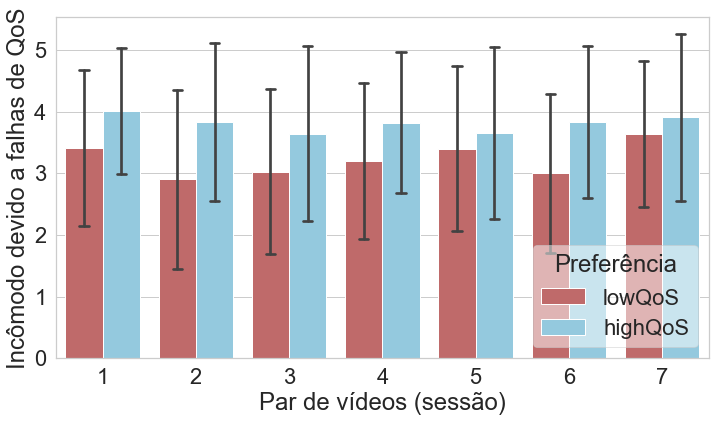

In [27]:
df_temp = pd.DataFrame(data=feedbacks_stress)
df_temp.Preferred_video.replace(1, 'lowQoS', inplace=True)
df_temp.Preferred_video.replace(2, 'highQoS', inplace=True)
df_temp.rename(index=str, columns={"Preferred_video": "Preferred video"}, inplace=True)
# plotDistribution3(feedbacks_stress, "intLowQoS")
# plotDistribution3(feedbacks_stress, "intHighQoS")

plotDistribution4(df_temp, "Annoyance")

In [50]:
df_temp.columns

Index(['index', 'Id', 'Session', 'Explanation_en', 'Explanation_pt',
       'Created_date', 'Published_date_x', 'Annoyance', 'intLowQoS',
       'intHighQoS', 'Comment_en', 'Commment_pt', 'Email', 'English',
       'Session_key', 'Preferred video', 'Version', 'User_Id', 'Stress',
       'Dif_interests', 'PolarityScore', 'Negative', 'Neutral', 'Positive',
       'Text_Len_pt', 'Text_Len_en', 'Text_Len_pt(abs)', 'Text_Len_en(abs)'],
      dtype='object')

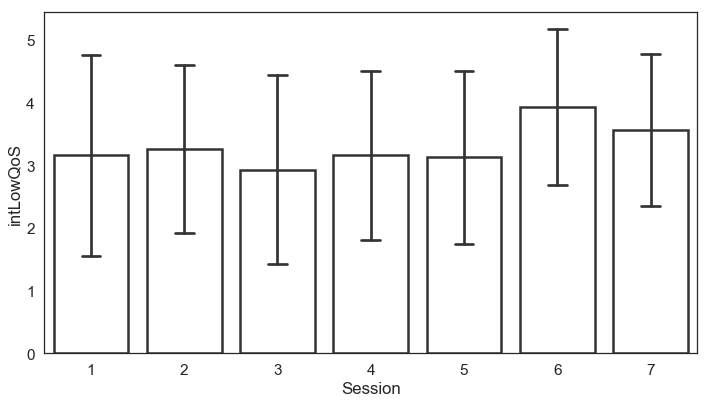

In [8]:
plotDistribution2(feedbacks_stress, "intLowQoS")

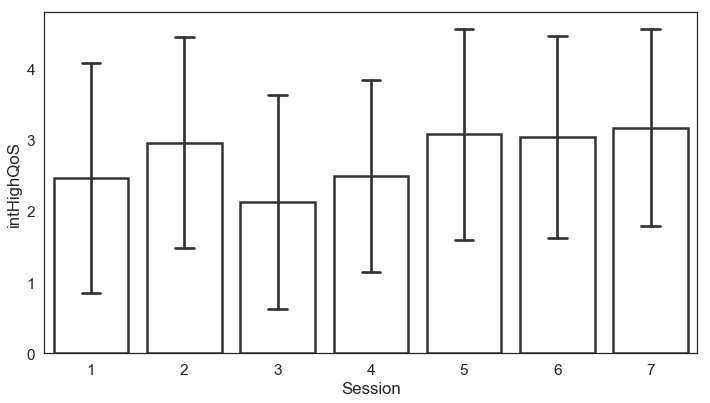

In [39]:
plotDistribution2(feedbacks_stress, "intHighQoS")

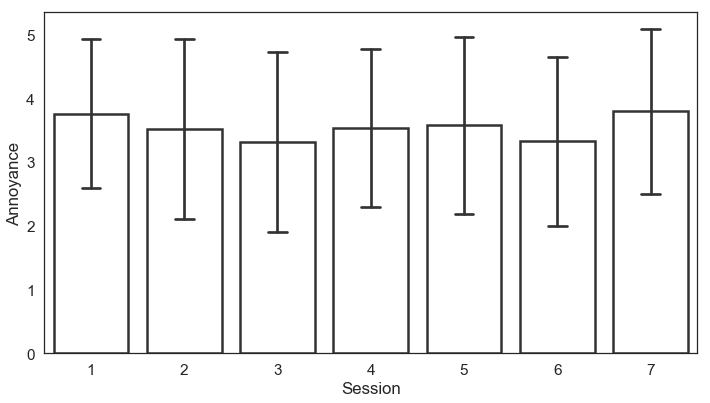

In [51]:
plotDistribution2(feedbacks_stress, "Annoyance")

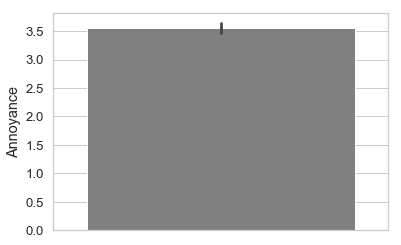

In [80]:
plotDistribution2(feedbacks_stress, "Annoyance")

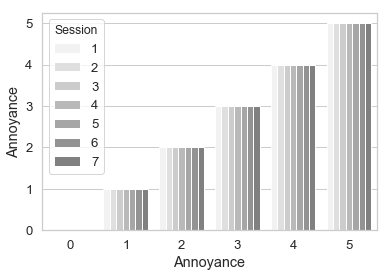

In [77]:
plotDistribution2(feedbacks_stress, "Annoyance")

[1, 53]

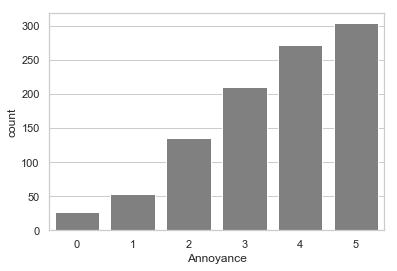

In [18]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.countplot(x="Annoyance", color='gray', data=feedbacks_stress)


In [124]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(temp1["Explanation_en"])

0        From my sense of humor, this video was funnier.
1      Because it was an unusual scene that surprised me
2            Because it had better visual communication.
3      Narration in pt-br. It made it easier to under...
4      Because despite the interruptions video 2 star...
5      It was a difficult choice. It was between choo...
6      Because the video was much more exciting than ...
7                                         Why Brazil won
8                          Because I like back door more
9                 because it was better than the second.
10       because the second did not arouse my curiosity.
11     Although I like humorous content in general th...
12                                               Funnier
13                                              Funnier.
14                                             More fun.
15     Images, effects, and sounds get more attention...
16                                       By the suspense
17                             

In [119]:
temp3 = feedbacks_stress.sort_values(by=['Published_date_x'])
temp3 = temp3.sort_values(by=['User_Id'])
temp3[['User_Id', 'Published_date_x']]

,User_Id,Published_date_x
4,1,2018-03-05 23:00:43
5,1,2018-03-05 23:04:09
6,1,2018-03-05 23:09:58
7,1,2018-03-05 23:16:04
8,1,2018-03-05 23:27:33
9,1,2018-03-05 23:32:57
10,1,2018-03-05 23:35:51
17,2,2018-03-06 0:45:33
16,2,2018-03-06 0:43:01
15,2,2018-03-06 0:39:45


In [8]:
temp11 = feedbacks_stress[feedbacks_stress["English"]==1]
temp11 = temp11[temp11['Session']==1]
temp11

,index,Id,Session,Explanation_en,Explanation_pt,Created_date,Published_date_x,Annoyance,intLowQoS,intHighQoS,...,Stress,Dif_interests,PolarityScore,Negative,Neutral,Positive,Text_Len_pt,Text_Len_en,Text_Len_pt(abs),Text_Len_en(abs)
232,236,284,1,NaN,NaN,2018-07-13 04:15:17,2018-07-13 4:15:17,3,3,1,...,3,2,0.0000,0.000,0.000,0.000,0,0,0,0
318,323,385,1,Funnier,Funnier,2018-07-29 12:48:41,2018-07-29 12:48:41,3,3,3,...,9,0,0.4019,0.000,0.000,1.000,-1,-1,1,1
326,331,393,1,The flaws were better,The flaws were better,2018-07-29 22:46:40,2018-07-29 22:46:40,4,1,1,...,3,0,0.4404,0.000,0.508,0.492,4,4,4,4
369,375,449,1,NaN,NaN,2018-08-03 11:51:17,2018-08-03 11:51:17,3,3,3,...,2,0,0.0000,0.000,0.000,0.000,0,0,0,0
434,441,531,1,NaN,NaN,2018-08-27 12:24:11,2018-08-27 12:24:11,2,1,2,...,0,-1,0.0000,0.000,0.000,0.000,0,0,0,0
436,443,534,1,cats !!!!,cats!!!!,2018-08-27 15:10:11,2018-08-27 15:10:11,2,3,3,...,8,0,0.0000,0.000,1.000,0.000,-1,-1,1,1
453,460,551,1,funnier,funnier,2018-08-31 16:54:51,2018-08-31 16:54:51,3,4,2,...,8,2,0.4019,0.000,0.000,1.000,-1,-1,1,1
456,463,554,1,No rebuffering,No rebuffering,2018-08-31 17:06:24,2018-08-31 17:06:24,3,2,2,...,9,0,-0.2960,0.688,0.312,0.000,2,2,2,2
461,468,560,1,NaN,NaN,2018-08-31 17:28:50,2018-08-31 17:28:50,3,1,1,...,7,0,0.0000,0.000,0.000,0.000,0,0,0,0
464,471,562,1,NaN,NaN,2018-08-31 17:31:38,2018-08-31 17:31:38,3,3,4,...,7,-1,0.0000,0.000,0.000,0.000,0,0,0,0


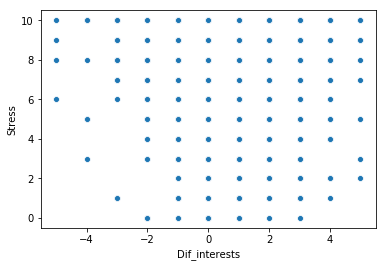

In [4]:
import seaborn as sns
sns.scatterplot(x="Dif_interests", y="Stress", data=feedbacks_stress)

In [108]:
feedbacks_stress.columns

Index(['index', 'Id', 'Session', 'Explanation_en', 'Explanation_pt',
       'Created_date', 'Published_date_x', 'Annoyance', 'intLowQoS',
       'intHighQoS', 'Comment_en', 'Commment_pt', 'Email', 'English',
       'Session_key', 'Preferred_video', 'Version', 'User_Id', 'Stress',
       'Dif_interests', 'PolarityScore', 'Negative', 'Neutral', 'Positive',
       'Text_Len_pt', 'Text_Len_en', 'Text_Len_pt(abs)', 'Text_Len_en(abs)'],
      dtype='object')

# Main

In [ ]:
display(getSessionInfo()) #Returns dataframe containing basics statistics for each session

In [69]:
aux1 = feedbacks_stress[feedbacks_stress['Session']==1]
aux1 = aux1[aux1['Preferred_video']==1]
aux1.shape[0]

65

In [50]:
feedbacks_stress[feedbacks_stress['Session']==1]['Preferred_video']==1

0       True
4      False
11      True
18     False
25      True
32      True
41     False
54     False
81      True
83     False
85      True
95     False
105     True
115    False
118     True
123     True
124    False
127    False
129    False
130    False
136    False
139    False
140    False
144     True
146    False
152    False
156     True
176    False
182     True
183     True
       ...  
737     True
758    False
761     True
766    False
773     True
780     True
785    False
798     True
812    False
819    False
824     True
827    False
831     True
862    False
865    False
868    False
871     True
877    False
884    False
891    False
898    False
907     True
912    False
945    False
951     True
961     True
966    False
970     True
984     True
992    False
Name: Preferred_video, Length: 152, dtype: bool

In [45]:
a = feedbacks_stress[feedbacks_stress['Session']==1].shape[0]
b = feedbacks_stress[feedbacks_stress['Session']==1][]
b

152

In [77]:
def printResumo(data):
    print("Média intLowQoS: "+ str( np.round(np.mean(aux['intLowQoS']),2) ) )
    print("Desvio Padrão intLowQoS: "+ str( np.round(np.std(aux['intLowQoS']),2) ) )
    print("\n")
    
    print("Média intHighhQoS: "+ str( np.round(np.mean(aux['intHighQoS']),2) ) )
    print("Desvio Padrão intHighQoS: "+ str( np.round(np.std(aux['intHighQoS']),2) ) )
    print("\n")
    
    print("Média Incômodo: "+ str( np.round(np.mean(aux['Annoyance']),2) ) )
    print("Desvio Incômodo: "+ str( np.round(np.std(aux['Annoyance']),2) ) )
    print("\n====================\n")
    
def printResumo2(data):
    total = feedbacks_stress[feedbacks_stress['Session']==i].shape[0]
    
    
    aux1 = feedbacks_stress[feedbacks_stress['Session']==i]
    aux1 = aux1[aux1['Preferred_video']==1]
    
    aux2 = feedbacks_stress[feedbacks_stress['Session']==i]
    aux2 = aux2[aux2['Preferred_video']==2]
    
    print( "Total: " + str(total) )
    print( "Preferred lowQoS: " + str( aux1.shape[0]) )
    print( "Preferred lowQoS (%): " + str( np.round(aux1.shape[0]/total ,3) ) )
    print( "Preferred highQoS: " + str( aux2.shape[0]) )
    print( "Preferred highQoS (%): " + str( np.round( aux2.shape[0]/total ,3) ) )
    print( "\n=================================")
    
for i in range(1,8):
    aux = feedbacks_stress[feedbacks_stress['Session']==i]
    printResumo2(aux)

Total: 152
Preferred lowQoS: 65
Preferred lowQoS (%): 0.428
Preferred highQoS: 87
Preferred highQoS (%): 0.572

Total: 118
Preferred lowQoS: 40
Preferred lowQoS (%): 0.339
Preferred highQoS: 78
Preferred highQoS (%): 0.661

Total: 135
Preferred lowQoS: 71
Preferred lowQoS (%): 0.526
Preferred highQoS: 64
Preferred highQoS (%): 0.474

Total: 158
Preferred lowQoS: 74
Preferred lowQoS (%): 0.468
Preferred highQoS: 84
Preferred highQoS (%): 0.532

Total: 135
Preferred lowQoS: 40
Preferred lowQoS (%): 0.296
Preferred highQoS: 95
Preferred highQoS (%): 0.704

Total: 141
Preferred lowQoS: 86
Preferred lowQoS (%): 0.61
Preferred highQoS: 55
Preferred highQoS (%): 0.39

Total: 163
Preferred lowQoS: 65
Preferred lowQoS (%): 0.399
Preferred highQoS: 98
Preferred highQoS (%): 0.601



In [35]:
a = [1,2,3]
placeholder = feedbacks_stress[feedbacks_stress['English']==0]

In [36]:
email_list = []
for email in placeholder['Email']:
    if email in email_list:
        pass
    else:
        email_list += [email]

print('Number of emails:'+str(len(email_list)))
print(email_list)

for email in email_list:
    print(email)

Number of emails:185
['sadoc@dcc.ufrj.br', 'mattgouvea@gmail.com', 'pedrovitor.marques@gmail.com', 'artur.ziviani@gmail.com', 'raulgbrmf@gmail.com', 'diogo.mvieira@gmail.com', 'sergiopnog@gmail.com', 'felipe.link1996@poli.ufrj.br', 'alexandre.tavares@ice.ufjf.br', 'ziviani@lncc.br', 'mario@dcc.ufrj.br', 'klaus@lncc.br', 'gxexeo@gmail.com', 'matwario@gmail.com', 'anamaria@dcc.ufrj.br', 'rookejf@gmail.com', 'mareas@gmail.com', 'yagoasl@hotmail.com', 'sermpezis@ics.forth.gr', 'm.goulart.teixeira@gmail.com', 'mluiza.campos@gmail.com', 'lucas44r@gmail.com', 'dlima@cos.ufrj.br', 'matheus.mrfm@gmail.com', 'bruno.meirelles.sousa@gmail.com', 'thomasbsjf@gmail.com', 'huggy_jf@hotmail.com', 'viniciusalves@ice.ufjf.br', 'marcolino_henrique@hotmail.com', 'tnoboatrindade@gmail.com', 'amohistria@gmail.com', 'accardoso@ice.ufjf.br', 'pauloalceu@gmail.com', 'anaclaudia@ice.ufjf.br', 'lbrugiolo@ice.ufjf.br', 'naoquero@informar.com.br', 'victorh1705@gmail.com', 'no@no.com', 'gmmoura@ice.ufjf.br', 'anon@s